Enlace al repositorio de github usado en la práctica:
https://github.com/Cocytus72/Grupo9-Practica1

#Requisitos para la trata de datos

In [3]:
!pip3 install --upgrade linear-tree
!pip3 install statsmodels
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install scikit-optimize
!pip3 install skopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a vers

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import ensemble, tree, linear_model
import time

from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, PredefinedSplit, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor 

import pickle

#Análisis Exploratorio de Datos - EDA

Antes del análisis de datos hemos de obtener los valores del fichero de datos disponibles y pasarlo a un dataframe. Esto se llevará a cabo con pandas al ser lo más conveniente para esta extracción de datos. Por otro lado, será necesario separar la salida o target del archivo para el entrenamiento y prueba de modelos para ver cual es el más conveniente como modelo final. Nótese que la variable de “feature_name_disp” es una variable que contiene los valores de los atributos y que será necesario para estudiar la correlación entre las familias de atributos, y la variable “ds” es una transposición del data frame para recoger los valores de X para entrenar y probar los modelos.

In [5]:
disp_df = pd.read_csv("./disp_st9ns1.txt.bz2", compression= "bz2", index_col=0)

comp_df = pd.read_csv("./comp_st9ns1.txt.bz2", compression= "bz2", index_col=0)

target = disp_df["salida"]
disp_df = disp_df.drop(columns=["salida"])

feature_names_disp = disp_df.columns.values.tolist()

ds = disp_df.T
feature_names_disp2 = ds.columns.values.tolist()

Para estudiar la correlación de los atributos se ha decidido hacer una matriz de correlación para estudiar a cada familia de estos. Se mostrarán por pantalla los resultados de la matriz de correlación, una representación gráfica de la matriz para su visualización y aclarar cuáles de los atributos de cada familia están muy correlados y necesitan eliminarse. Se tiene que aclarar que para este estudio se consideran solo los datos de entrenamiento (los 10 años) debido a que los de prueba o test tenemos que asumir que no constamos de ellos. Más tarde cuando se estudie la reducción de dimensionalidad se eliminarán los atributos correlados y se estudiará si hay mejora, no mejora o empeora reduciendo los atributos que están correlados para los mejores modelos de métodos básicos y avanzados pero por ahora los mantendremos para el estudio del modelo más conveniente de cada método. 


       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1
V1       0.000000    0.000000    0.000000    0.000000    0.000000
V2       0.000909    0.021818    0.024545    0.393636    0.811818
V3       0.000000    0.000000    0.000000    0.000000    0.017273
V4       0.000000    0.013636    0.009091    0.000000    0.000000
V5       0.000000    0.000000    0.000000    0.000000    0.000000
...           ...         ...         ...         ...         ...
V3646    0.000000    0.000000    0.000000    0.000000    0.000000
V3647    0.000000    0.132727    0.431818    0.170000    0.240909
V3648    1.251818    0.030000    0.034545    0.001818    0.000909
V3649    0.000000    0.000000    0.000000    0.000000    0.000000
V3650    0.000000    0.000000    0.000000    0.000000    0.000000

[3650 rows x 5 columns]

            apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1
apcp_sf1_1    1.000000    0.547248    0.509415    0.312009    0.312376
apcp_sf2_1    0.547248    1.000000    0

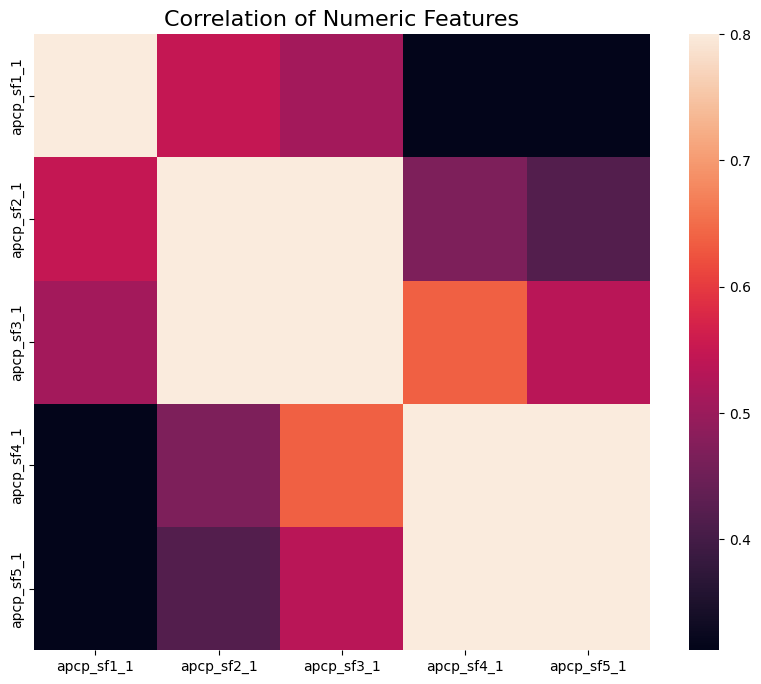

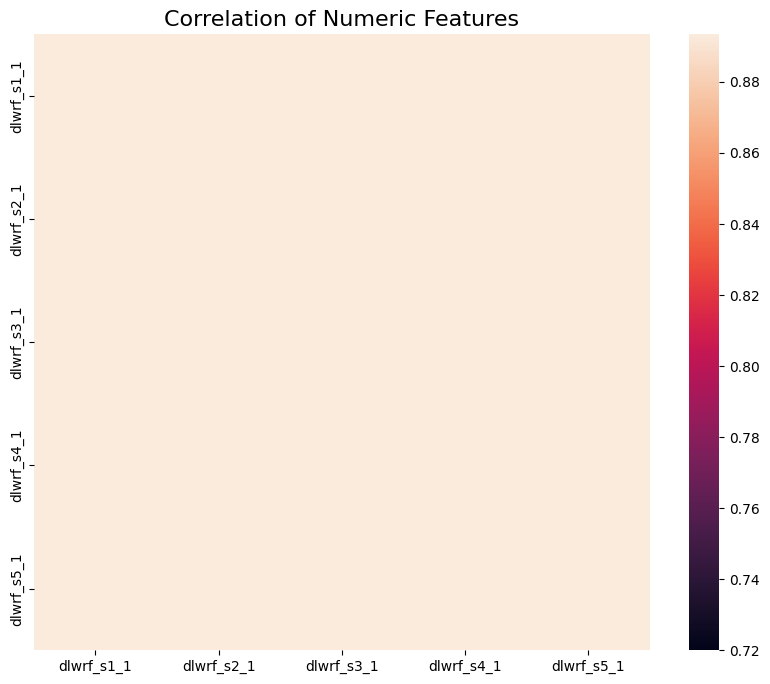

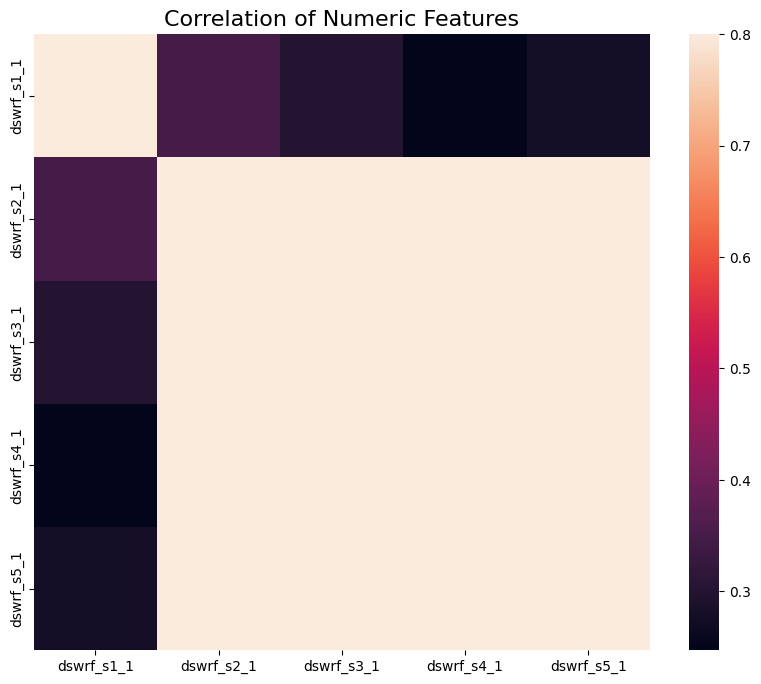

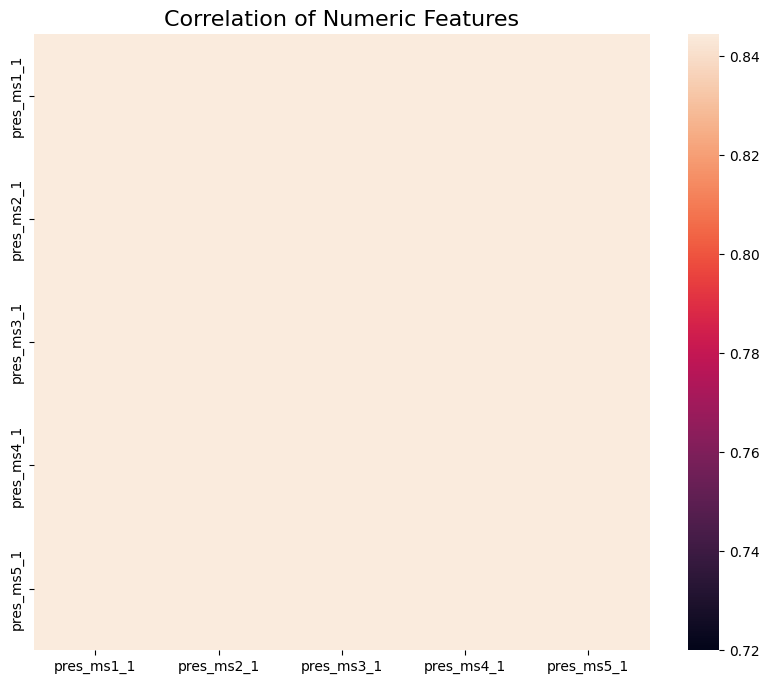

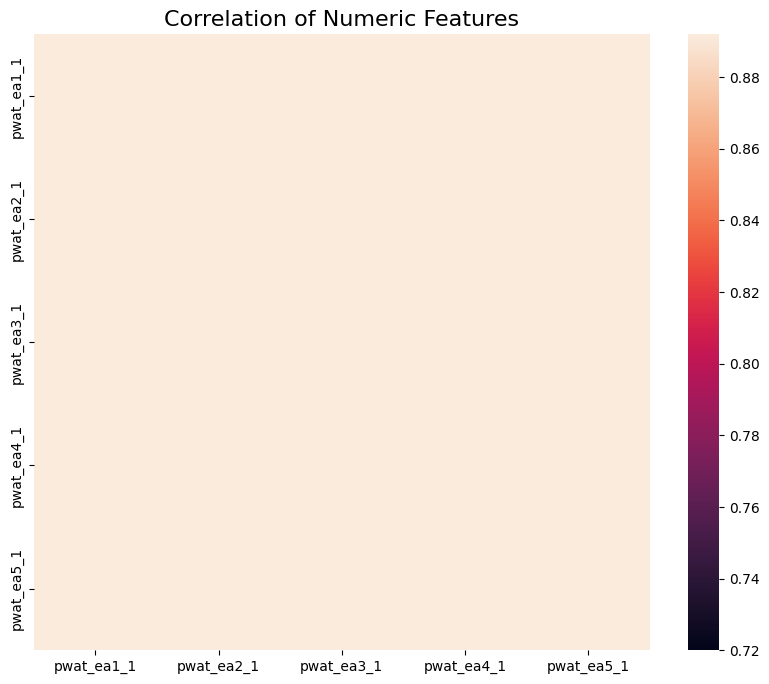

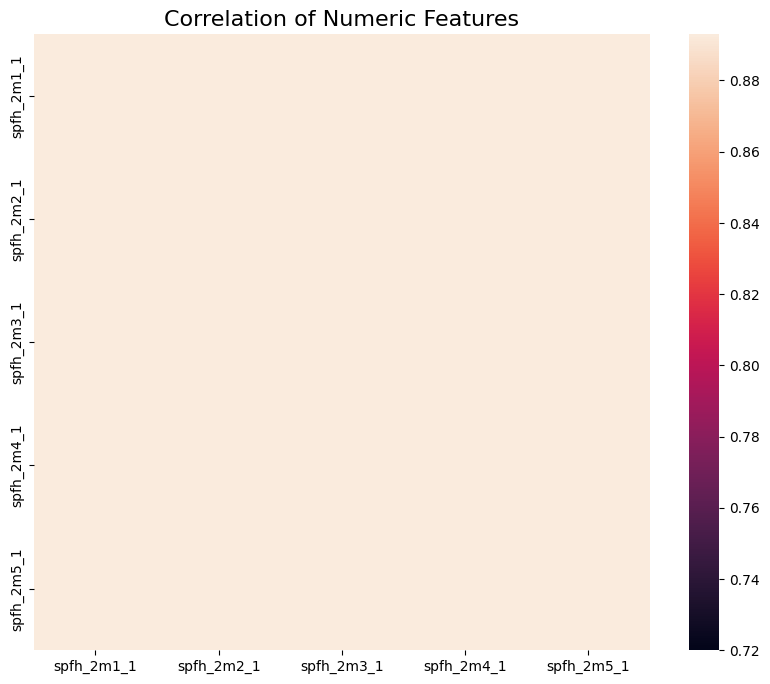

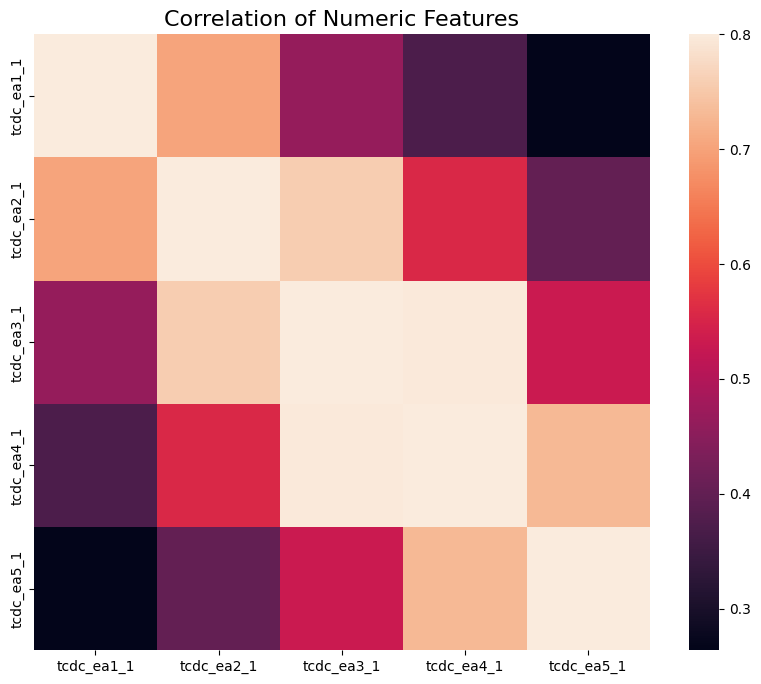

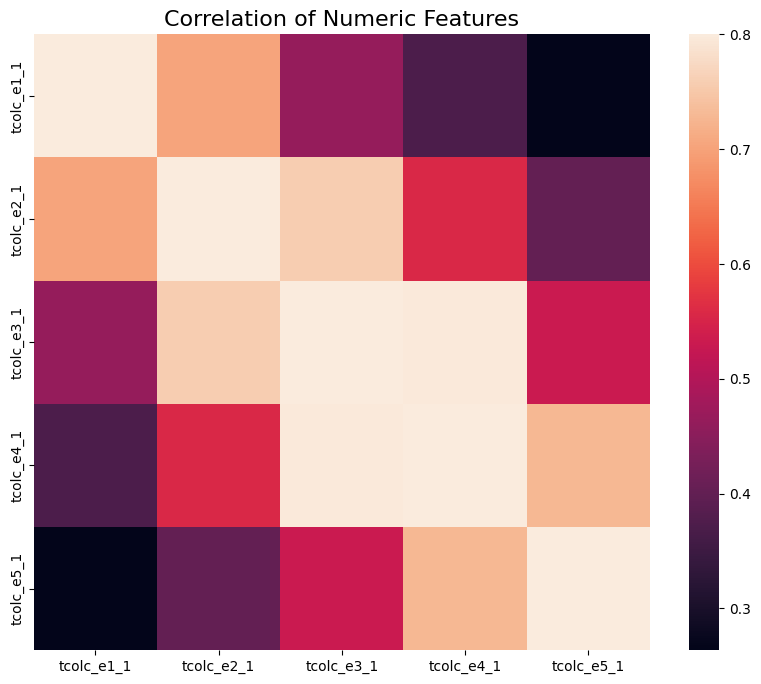

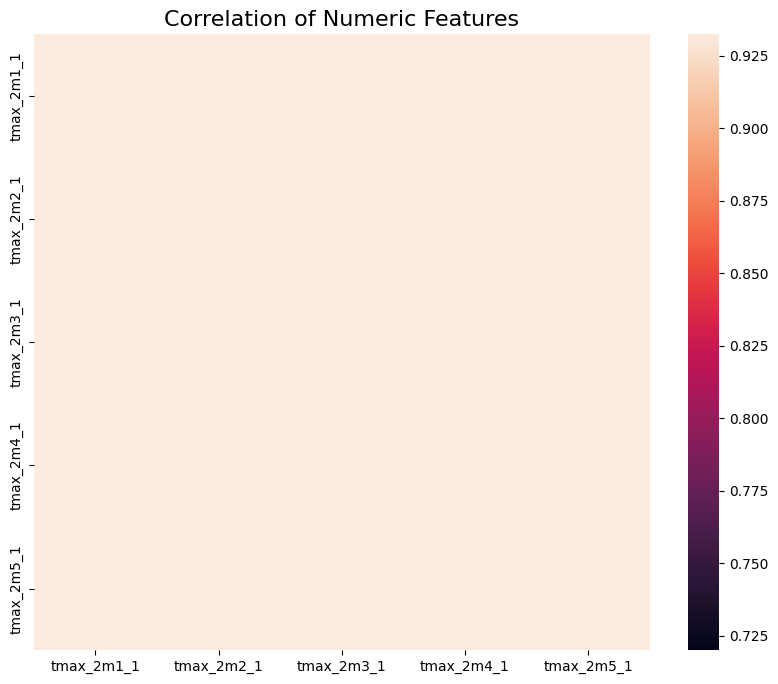

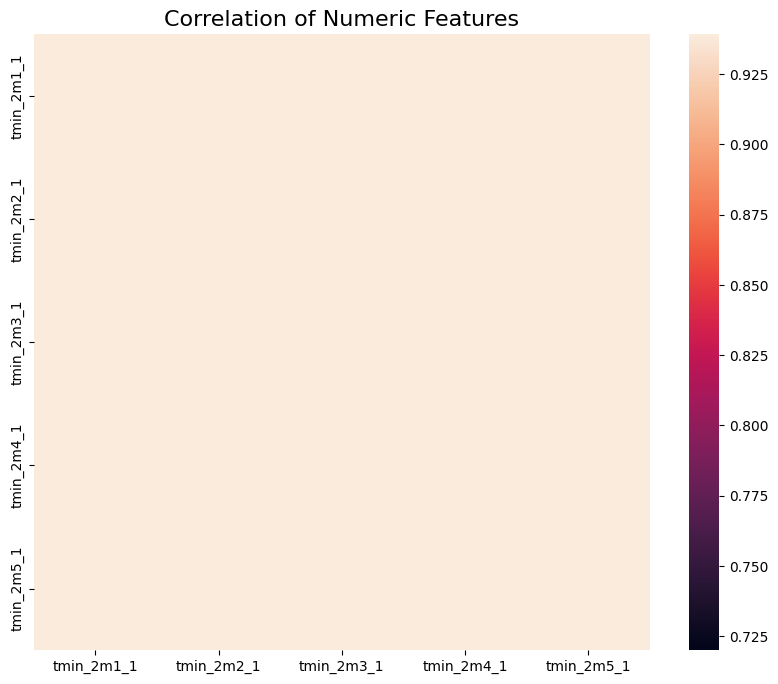

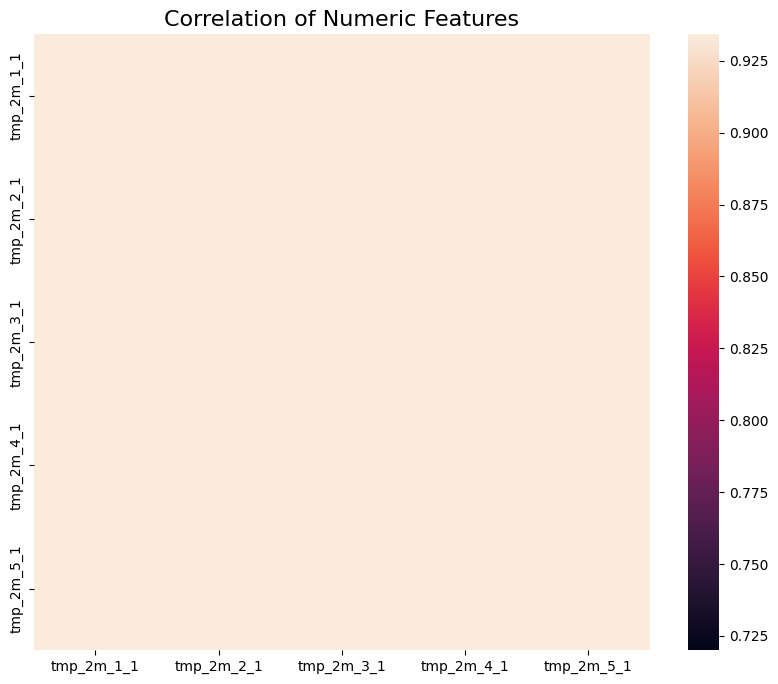

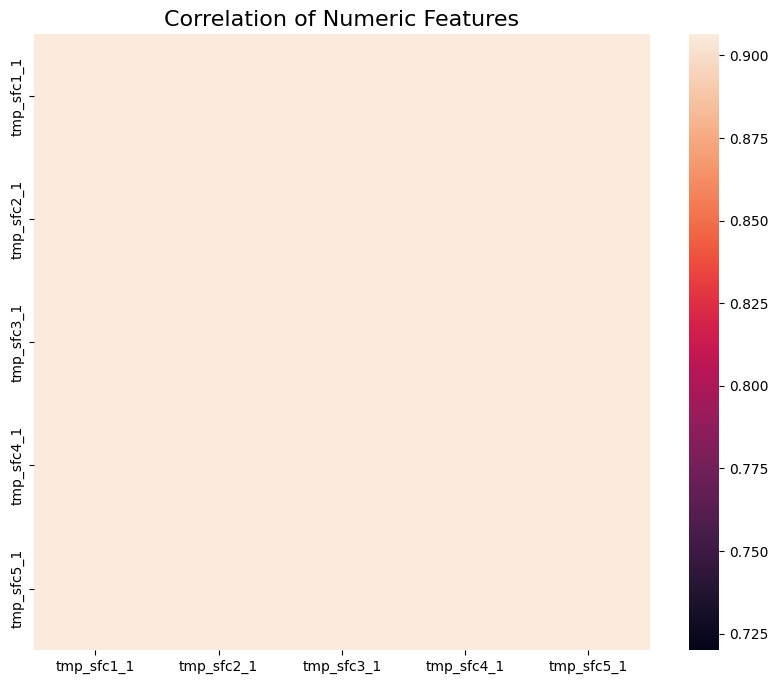

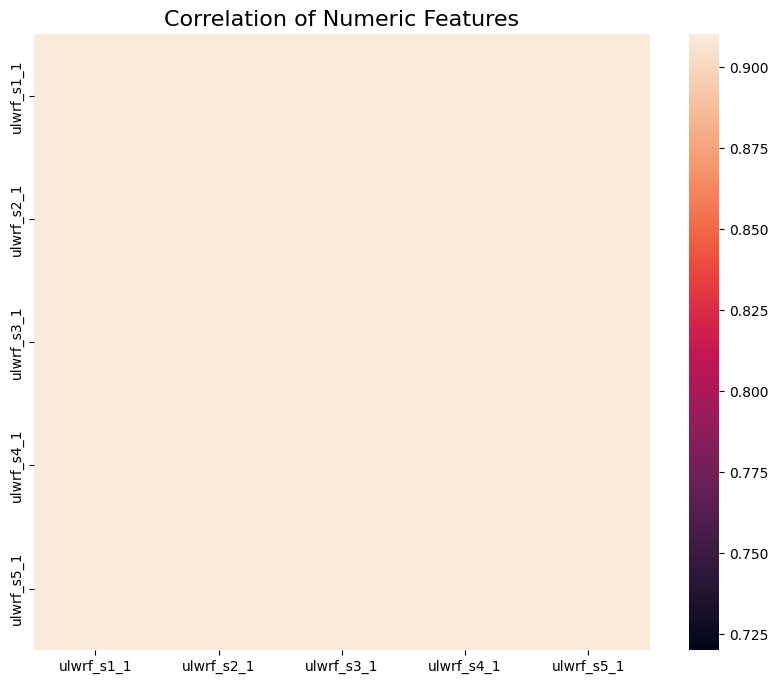

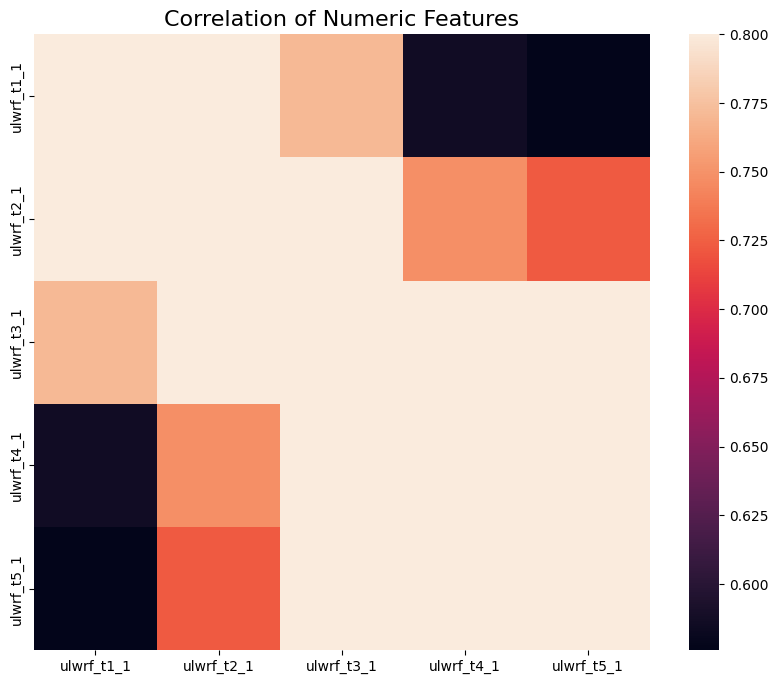

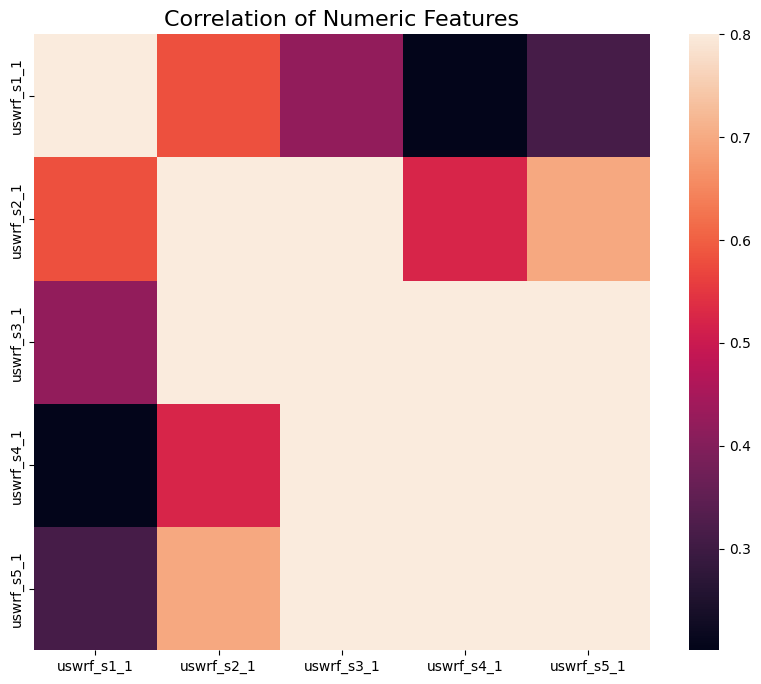

In [6]:
i = 0
j = 5
ft_drop = []

while i < len(feature_names_disp):

    #Create features and target
    X = disp_df[feature_names_disp[i:j]].head(3650)

    #Convert feature matrix into DataFrame

    df = pd.DataFrame(X)
    print()
    print(df)

    # Create correlation matrix

    corr_matrix = df.corr().abs()
    print()
    print(corr_matrix)

    f , ax = plt.subplots(figsize = (10,8))
    plt.title('Correlation of Numeric Features',y=1,size=16)
    sns.heatmap(corr_matrix,square = True,  vmax=0.8)

    # Select upper triangle of correlation matrix

    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    print()
    print(upper)

    # Find index of feature columns with correlation greater than 0.95

    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    print()
    print(to_drop)
    
    for t in to_drop:
        ft_drop.append(t)
        
    i+= 5
    j+= 5


#Drop features with high correlation

dsp2_df = disp_df.drop(columns=ft_drop)
ds2 = dsp2_df.T

V = []
y=target.T.tolist()
for i in ds2.columns:
    V.append(ds2[i].tolist())

V_train=V[0:3650]
V_test=V[3650:]
w_train=y[0:3650]
w_test=y[3650:]
    

In [7]:
# X recoge los datos para realizar el train/test del modelo
# y recoge el target o salida del modelo
X = []
y=target.T.tolist()
for i in ds.columns:
    X.append(ds[i].tolist())

#Métodos básicos

Es el momento de estudiar los modelos básicos indicados en el enunciado. Se ha decidido que se probarán distintas combinaciones de modelos para cada tipo de regresión indicada, esto es para árboles y KNN se probarán estos métodos sin hiper parámetros, con hiper parámetros y validaciones cruzadas ,GridSearch, RandomSearch y Bayes, con hiper parámetros. En el caso de regresión lineal se sigue con la misma metodología pero para validaciones cruzadas se realizará con Ridge , Lasso y con y sin hiper parámetros. Nótese que en todo momento se prueban los modelos escalando los datos y que el escalador utilizado ha sido seleccionado tras una serie de pruebas en el que se ha probado cuál era el más conveniente para cada método. Al final de cada método básico dejaremos constancia de cuál bajo nuestro criterio es el mejor. Finalmente cuando se obtengan todos los modelos básicos se dejará una conclusión final de cuál es el mejor para esta práctica. Las evaluaciones irán en base a RMSE , MAE, comparaciones con los modelos triviales (dummy) de dichos modelos y el tiempo que tardan en realizarse. Es necesario mencionar que alguno de estos modelos, en concreto los modelos en el que no se ajustan los hiper parámetros, hemos de hacer el RMSE y MAE manualmente ya que al no ajustar los hiper parámetros el scoring lo hemos considerado como uno y entonces por defecto no viene ninguno y no podemos obtener los mejores valores de estos. También dejamos constancia de “.score()” en los modelos sin hiper parámetros aunque sea un R2. Se ha decidido probar el método de Grid Search ya que realiza una búsqueda exhaustiva de todos los posibles valores de hiper parámetros especificados además de evaluar el rendimiento del modelo para cada combinación de estos. Por otro lado, Bayes Search encuentra la combinación de hiper parámetros óptima y puede ser especialmente útil si se trata de ajustar muchos hiper parámetros sin realizar una búsqueda exhaustiva de todas las combinaciones. Finalmente, Random Search consideramos que es uno de los más útiles al no conocer los valores óptimos de los hiper parámetros. Este modelo es perfecto al tener un enfoque más exploratorio realizando una búsqueda aleatoria en un rango de valores de cada hiper parámetro y evalúa el rendimiento de este para cada combinación aleatoria.


In [8]:
X_train=X[0:3650]
X_test=X[3650:]
y_train=y[0:3650]
y_test=y[3650:]

##KNN

KNN sin hyperparámetros

In [9]:
#KNN Regressor no Hyperparameter Tuning with robust scaler

# Scale the data using RobustScaler, con este sube mucho el RMSE y el MAE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Create a KNN regressor
inicio = time.time()
knn = KNeighborsRegressor()

# Train the model on the scaled training data
knn.fit(X_train_train_scaled, y_train_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)

# Predict on the scaled test data
y_pred = knn.predict(X_train_test_scaled)

print(f"Score of the KNN with no hyper-pars: {knn.score(X=X_train_train_scaled, y=y_train_train)}")

# Evaluate the model
rmse_knn = np.sqrt(metrics.mean_squared_error(y_train_test, y_pred))

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))

print(f"RMSE of the KNN with no hyper-pars: {rmse_knn}")
print(f"RMSE of dummy(mean) with no hyper-pars: {rmse_mean}")
print(f"RMSE ratio KNN/dummy(mean) with no hyper-pars: {rmse_knn/rmse_mean}")

mae_knn = metrics.mean_absolute_error(y_train_test, y_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))

print(f"MAE of the KNN with no hyper-pars: {mae_knn}")
print(f"MAE of dummy(median) with no hyper-pars: {mae_median}")
print(f"MAE ratio KNN/dummy(median) with no hyper-pars: {mae_knn/mae_median}")

El tiempo tardado es: tiempo =  0.0037479400634765625
Score of the KNN with no hyper-pars: 0.8325743155948495
RMSE of the KNN with no hyper-pars: 3686116.807495465
RMSE of dummy(mean) with no hyper-pars: 7686093.250180669
RMSE ratio KNN/dummy(mean) with no hyper-pars: 0.4795826289784891
MAE of the KNN with no hyper-pars: 2536562.268493151
MAE of dummy(median) with no hyper-pars: 6700264.876712329
MAE ratio KNN/dummy(median) with no hyper-pars: 0.3785764167785835


KNN con hyperparámetros

In [10]:
#KNN Regressor Hyperparameter Tuning with robust scaler

# Scale the data using RobustScaler, con este sube mucho el RMSE y el MAE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Create a KNN regressor
inicio = time.time()
knn = KNeighborsRegressor(n_neighbors=30)

# Train the model on the scaled training data
knn.fit(X_train_train_scaled, y_train_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)

# Predict on the scaled test data
y_pred = knn.predict(X_train_test_scaled)

print(f"Score of the KNN with hyper-pars: {knn.score(X=X_train_train_scaled, y=y_train_train)}")

# Evaluate the model
rmse_knn = np.sqrt(metrics.mean_squared_error(y_train_test, y_pred))

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))

print(f"RMSE of the KNN with hyper-pars: {rmse_knn}")
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio KNN/dummy(mean) with hyper-pars: {rmse_knn/rmse_mean}")

mae_knn = metrics.mean_absolute_error(y_train_test, y_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))

print(f"MAE of the KNN with hyper-pars: {mae_knn}")
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio KNN/dummy(median) with hyper-pars: {mae_knn/mae_median}")

El tiempo tardado es: tiempo =  0.0018777847290039062
Score of the KNN with hyper-pars: 0.7746563109779034
RMSE of the KNN with hyper-pars: 3538954.9859442236
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio KNN/dummy(mean) with hyper-pars: 0.4604361241468202
MAE of the KNN with hyper-pars: 2514887.060273973
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio KNN/dummy(median) with hyper-pars: 0.37534143896531624


KNN con validación cruzada GridSearchCV con scoring RMSE

In [11]:
#--------------------------------------------------------------------------------------------------------------
#KNN Regressor with Hyperparameter with GridSearchCV
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'n_neighbors': list(range(2,30,1))}

np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

# Definition of a 2-step process that self-adjusts 2 hyperpars
inicio = time.time()
regr = GridSearchCV(KNeighborsRegressor(), 
                   param_grid,
                   scoring='neg_root_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Train the self-adjusting process
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

#Evalución del modelo con RMSE
rmse_knn = -regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio KNN/dummy(mean) with hyper-pars: {rmse_knn/rmse_mean}")

Fitting 1 folds for each of 28 candidates, totalling 28 fits
El tiempo tardado es: tiempo =  1.8110499382019043
El mejor score obtenido es: -3500144.462661868 y los mejores parámetros son: {'n_neighbors': 18}
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio KNN/dummy(mean) with hyper-pars: 0.4553866767853218


KNN con validación cruzada GridSearchCV con scoring MAE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#KNN Regressor with Hyperparameter with GridSearchCV
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'n_neighbors': list(range(2,30,1))}

np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

# Definition of a 2-step process that self-adjusts 2 hyperpars
inicio = time.time()
regr = GridSearchCV(KNeighborsRegressor(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Train the self-adjusting process
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

#Evalución del modelo con MAE

mae_knn = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio KNN/dummy(median) with hyper-pars: {mae_knn/mae_median}")

Fitting 1 folds for each of 28 candidates, totalling 28 fits
El tiempo tardado es: tiempo =  3.4471938610076904
El mejor score obtenido es: -2456372.2039573817 y los mejores parámetros son: {'n_neighbors': 18}
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio KNN/dummy(median) with hyper-pars: 0.36660822357856826


KNN con validación cruzada RandomSearchCV con scoring RMSE

In [12]:
#--------------------------------------------------------------------------------------------------------------
#KNN Regressor with Hyperparameter Tuning with RandomizedSearchCV
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'n_neighbors': list(range(2,30,1))}

# Inner evaluation
np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

budget = 14
inicio = time.time()
regr = RandomizedSearchCV(KNeighborsRegressor(), 
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )

# Train the self-adjusting process
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

#Evalución del modelo con RMSE

rmse_knn = -regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio KNN/dummy(mean) with hyper-pars: {rmse_knn/rmse_mean}")

Fitting 1 folds for each of 14 candidates, totalling 14 fits
El tiempo tardado es: tiempo =  1.5066003799438477
El mejor score obtenido es: -3500144.462661868 y los mejores parámetros son: {'n_neighbors': 18}
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio KNN/dummy(mean) with hyper-pars: 0.4553866767853218


KNN con validación cruzada RandomSearchCV con scoring MAE

In [13]:
#--------------------------------------------------------------------------------------------------------------
#KNN Regressor with Hyperparameter Tuning with RandomizedSearchCV
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'n_neighbors': list(range(2,30,1))}

# Inner evaluation
np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

budget = 14
inicio = time.time()
regr = RandomizedSearchCV(KNeighborsRegressor(), 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )

# Train the self-adjusting process
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

#Evalución del modelo con MAE

mae_knn = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio KNN/dummy(median) with hyper-pars: {mae_knn/mae_median}")

Fitting 1 folds for each of 14 candidates, totalling 14 fits
El tiempo tardado es: tiempo =  2.360236644744873
El mejor score obtenido es: -2456372.2039573817 y los mejores parámetros son: {'n_neighbors': 18}
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio KNN/dummy(median) with hyper-pars: 0.36660822357856826


KNN con validación cruzada BayesSearchCV con scoring RMSE

In [14]:
#--------------------------------------------------------------------------------------------------------------
#KNN Regressor with Hyperparameter Tuning with BayesSearchCV                                
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space with integer uniform distributions
param_grid = {'n_neighbors': Integer(2,30)}

np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])
budget = 14
inicio = time.time()
regr = BayesSearchCV(KNeighborsRegressor(), 
                    param_grid,
                    scoring='neg_root_mean_squared_error',
                    cv=inner,    
                    n_jobs=1, verbose=1,
                    n_iter=budget
                    )

# Train the self-adjusting process
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

#Evalución del modelo con RMSE

rmse_knn = -regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio KNN/dummy(mean) with hyper-pars: {rmse_knn/rmse_mean}")

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits
El tiempo tardado es: tiempo =  11.585101127624512
El mejor score obtenido es: -3500144.462661868 y los mejores parámetros son: OrderedDict([('n_neighbors', 18)])
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio KNN/dummy(mean) with hyper-pars: 0.4553866767853218


KNN con validación cruzada BayesSearchCV con scoring MAE

In [15]:
#--------------------------------------------------------------------------------------------------------------
#KNN Regressor with Hyperparameter Tuning with BayesSearchCV                   
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space with integer uniform distributions
param_grid = {'n_neighbors': Integer(2,30)}

np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])
budget = 14
inicio = time.time()
regr = BayesSearchCV(KNeighborsRegressor(), 
                    param_grid,
                    scoring='neg_mean_absolute_error',
                    cv=inner,    
                    n_jobs=1, verbose=1,
                    n_iter=budget
                    )

# Train the self-adjusting process
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

#Evalución del modelo con MAE

mae_knn = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio KNN/dummy(median) with hyper-pars: {mae_knn/mae_median}")

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits
El tiempo tardado es: tiempo =  9.127570152282715
El mejor score obtenido es: -2456372.2039573817 y los mejores parámetros son: OrderedDict([('n_neighbors', 18)])
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio KNN/dummy(median) with hyper-pars: 0.36660822357856826


Para KNN se ha decidido utilizar una cantidad de 30 vecinos o como lo hemos visto nosotros, un mes o 30 días, no pensamos que sea una mala cantidad de vecinos y que tampoco se pierda localidad. Para los modelos de validación cruzada que requieran de un budget se ha decidido que el mejor para este método es de 14 y se puede comprobar en el caso de BayesCV que no existen más mejoras a partir de la 11 interacción. Este valor de budget consideramos que es ideal y que no requiera que sea más alto pero no puede ser menor a 11 por lo mencionado anteriormente. Tras realizar los modelos se concluye de que todos los modelos de validación cruzada son los mejores ya que aportan los mismos resultados y por lo tanto la decisión ha recaído en el tiempo de ejecución y que por muy poca diferencia se ha decidido usar RandomSearchCV. Nótese que este método ha requerido de semillas por la variación de los resultados, la semilla es el número del grupo.

##Arbol de regresión 

Árboles sin hyperparámetros

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#TREE Regressor with no Hyperparameter Tuning
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Here, we set our model to classification tree
inicio = time.time()
regr = DecisionTreeRegressor()
# We train it
regr.fit(X_train_train, y_train_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"Score of the TREE with no hyper-pars: {regr.score(X=X_train_train, y=y_train_train)}")
# We obtain predictions on the test set
y_test_pred = regr.predict(X_train_test)
# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_train_test, y_test_pred))

# We would have to compute the final model with all available data
# Not done here, only interested on test RMSE

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test)))

print(f"RMSE of the TREE with no hyper-pars: {rmse_tree}")
print(f"RMSE of dummy(mean) with no hyper-pars: {rmse_mean}")
print(f"RMSE ratio TREE/dummy(mean) with no hyper-pars: {rmse_tree/rmse_mean}")

mae_tree = metrics.mean_absolute_error(y_train_test, y_test_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test))

print(f"MAE of the TREE with no hyper-pars: {mae_tree}")
print(f"MAE of dummy(median) with no hyper-pars: {mae_median}")
print(f"MAE ratio TREE/dummy(median) with no hyper-pars: {mae_tree/mae_median}")

El tiempo tardado es: tiempo =  0.3731565475463867
Score of the TREE with no hyper-pars: 1.0
RMSE of the TREE with no hyper-pars: 4653457.883024664
RMSE of dummy(mean) with no hyper-pars: 7686093.250180669
RMSE ratio TREE/dummy(mean) with no hyper-pars: 0.605438645037943
MAE of the TREE with no hyper-pars: 3169873.890410959
MAE of dummy(median) with no hyper-pars: 6700264.876712329
MAE ratio TREE/dummy(median) with no hyper-pars: 0.47309680269929055


Árboles con hyperparámetros

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#TREE Regressor with Hyperparameter Tuning
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Here, we set our model to classification tree
inicio = time.time()
regr = DecisionTreeRegressor(max_depth= 14, min_samples_split= 7)
# We train it
regr.fit(X_train_train, y_train_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"Score of the TREE with hyper-pars: {regr.score(X=X_train_train, y=y_train_train)}")
# We obtain predictions on the test set
y_test_pred = regr.predict(X_train_test)
# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_train_test, y_test_pred))

# We would have to compute the final model with all available data
# Not done here, only interested on test RMSE

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test)))

print(f"RMSE of the TREE with hyper-pars: {rmse_tree}")
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio TREE/dummy(mean) with hyper-pars: {rmse_tree/rmse_mean}")

mae_tree = metrics.mean_absolute_error(y_train_test, y_test_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test))

print(f"MAE of the TREE with hyper-pars: {mae_tree}")
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio TREE/dummy(median) with hyper-pars: {mae_tree/mae_median}")

El tiempo tardado es: tiempo =  0.21337294578552246
Score of the TREE with hyper-pars: 0.9578216296313637
RMSE of the TREE with hyper-pars: 4240085.3427690845
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio TREE/dummy(mean) with hyper-pars: 0.5516567656357041
MAE of the TREE with hyper-pars: 2929046.588653729
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio TREE/dummy(median) with hyper-pars: 0.4371538502655356


Árboles con validación cruzada GridSearchCV con scoring RMSE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#TREE Regressor with Hyperparameter with GridSearchCV
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))
              }

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

inicio = time.time()
# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_root_mean_squared_error',
                   cv=inner, 
                   n_jobs=-1, verbose=1
                        )

# Train the self-adjusting process
regr.fit(X=X_train, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

rmse_tree = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio TREE/dummy(mean) with hyper-pars: {rmse_tree/rmse_mean}")

Fitting 1 folds for each of 60 candidates, totalling 60 fits
El tiempo tardado es: tiempo =  17.365410089492798
El mejor score obtenido es: -3519026.018322663 y los mejores parámetros son: {'max_depth': 5, 'min_samples_split': 2}
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio TREE/dummy(mean) with hyper-pars: 0.4578432636424161


Árboles con validación cruzada GridSearchCV con scoring MAE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#TREE Regressor with Hyperparameter with GridSearchCV
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))
              }

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

inicio = time.time()
# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=inner, 
                   n_jobs=-1, verbose=1
                        )

# Train the self-adjusting process
regr.fit(X=X_train, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

mae_tree = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test))
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio TREE/dummy(median) with hyper-pars: {mae_tree/mae_median}")

Fitting 1 folds for each of 60 candidates, totalling 60 fits
El tiempo tardado es: tiempo =  9.004920482635498
El mejor score obtenido es: -2444046.9302265174 y los mejores parámetros son: {'max_depth': 6, 'min_samples_split': 3}
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio TREE/dummy(median) with hyper-pars: 0.36476870320770916


Árboles con validación cruzada RandomSearchCV con scoring RMSE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#TREE Regressor with Hyperparameter Tuning with RandomizedSearchCV              
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))
              }

# Inner evaluation
np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

budget = 14
inicio = time.time()
regr = RandomizedSearchCV(DecisionTreeRegressor(), 
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )
regr.fit(X=X_train, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

rmse_tree = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio TREE/dummy(mean) with hyper-pars: {rmse_tree/rmse_mean}")

Fitting 1 folds for each of 14 candidates, totalling 14 fits
El tiempo tardado es: tiempo =  2.1743555068969727
El mejor score obtenido es: -3519026.018322663 y los mejores parámetros son: {'min_samples_split': 4, 'max_depth': 5}
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio TREE/dummy(mean) with hyper-pars: 0.4578432636424161


Árboles con validación cruzada RandomSearchCV con scoring MAE

In [25]:
#--------------------------------------------------------------------------------------------------------------
#TREE Regressor with Hyperparameter Tuning with RandomizedSearchCV   0.36674916059040397               
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))
              }

# Inner evaluation
np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

budget = 14
inicio = time.time()
regr = RandomizedSearchCV(DecisionTreeRegressor(), 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )
regr.fit(X=X_train, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

mae_tree = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test))
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio TREE/dummy(median) with hyper-pars: {mae_tree/mae_median}")

Fitting 1 folds for each of 14 candidates, totalling 14 fits
El tiempo tardado es: tiempo =  3.455916166305542
El mejor score obtenido es: -2457316.519267613 y los mejores parámetros son: {'min_samples_split': 2, 'max_depth': 6}
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio TREE/dummy(median) with hyper-pars: 0.36674916059040397


Árboles con validación cruzada BayesSearchCV con scoring RMSE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#TREE Regressor with Hyperparameter Tuning with BayesSearchCV
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space with integer uniform distributions
param_grid = {'max_depth': Integer(2,14),
              'min_samples_split': Integer(2,7)}

np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])
budget = 14
inicio = time.time()
regr = BayesSearchCV(DecisionTreeRegressor(), 
                    param_grid,
                    scoring='neg_root_mean_squared_error',
                    cv=inner,    
                    n_jobs=1, verbose=1,
                    n_iter=budget
                    )
regr.fit(X=X_train, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

rmse_tree = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio TREE/dummy(mean) with hyper-pars: {rmse_tree/rmse_mean}")

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits
El tiempo tardado es: tiempo =  8.640892744064331
El mejor score obtenido es: -3523133.8971914463 y los mejores parámetros son: OrderedDict([('max_depth', 5), ('min_samples_split', 7)])
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio TREE/dummy(mean) with hyper-pars: 0.4583777196703451


Árboles con validación cruzada BayesSearchCV con scoring MAE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#TREE Regressor with Hyperparameter Tuning with BayesSearchCV
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space with integer uniform distributions
param_grid = {'max_depth': Integer(2,14),
              'min_samples_split': Integer(2,7)}

np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])
budget = 14
inicio = time.time()
regr = BayesSearchCV(DecisionTreeRegressor(), 
                    param_grid,
                    scoring='neg_mean_absolute_error',
                    cv=inner,    
                    n_jobs=1, verbose=1,
                    n_iter=budget
                    )
regr.fit(X=X_train, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

mae_tree = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test))
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio TREE/dummy(median) with hyper-pars: {mae_tree/mae_median}")

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
El tiempo tardado es: tiempo =  14.500887393951416
El mejor score obtenido es: -2464130.697349805 y los mejores parámetros son: OrderedDict([('max_depth', 6), ('min_samples_s

Para árboles de decisión se han elegido los hiper parámetros de “max_depth” y “min_samples_split”. Para “max_depth” se ha elegido 14 o como lo hemos considerado, 2 semanas, y “min_sample_split” se ha elegido 7 como un valor justo mínimo. Estos valores se aplican a todos los modelos de hiper parámetros de árboles de decisión. Para los modelos que requieran un budget se ha utilizado 14 al igual que en KNN. En el caso de Bayes nos hemos dado cuenta de que aumentado el budget a 17 para MAE se siguen obteniendo mejoras pero en el caso de RMSE no ya que no hay más mejoras a partir de 11. La conclusión es que el mejor modelo entre los evaluados ha sido la validación cruzada de RandomSearch, la única diferencia es mínima en el MAE comparándolo con GridSearch por lo que se ha escogido por el tiempo. Este método también ha requerido de semilla y se ha utilizado el NIA de uno de los alumnos.

##Regresión Lineal

LinearRegression sin hyperparámetros

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#LinearRegression with no Hyperparameter Tuning
#--------------------------------------------------------------------------------------------------------------

# Create a Linear regression
inicio = time.time()
lreg = LinearRegression()

# Train the model on the scaled training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

lreg.fit(X_train_train_scaled, y_train_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
# Predict on the scaled test data
y_pred = lreg.predict(X_train_test_scaled)
print(f"Score of the LinearRegression with no hyper-pars: {lreg.score(X=X_train_train_scaled, y=y_train_train)}")

# Evaluate the model
rmse_lreg = np.sqrt(metrics.mean_squared_error(y_train_test, y_pred))

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))

print(f"RMSE of the LinearRegression with no hyper-pars: {rmse_lreg}")
print(f"RMSE of dummy(mean) with no hyper-pars: {rmse_mean}")
print(f"RMSE ratio LinearRegression/dummy(mean) with no hyper-pars: {rmse_lreg/rmse_mean}")

mae_lreg = metrics.mean_absolute_error(y_train_test, y_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_test, regr_median.predict(X_train_test_scaled))

print(f"MAE of the LinearRegression with no hyper-pars: {mae_lreg}")
print(f"MAE of dummy(median) with no hyper-pars: {mae_median}")
print(f"MAE ratio LinearRegression/dummy(median) with no hyper-pars: {mae_lreg/mae_median}") 

El tiempo tardado es: tiempo =  0.44898271560668945
Score of the LinearRegression with no hyper-pars: 0.8017274172498765
RMSE of the LinearRegression with no hyper-pars: 3218933.213636913
RMSE of dummy(mean) with no hyper-pars: 7686093.250180669
RMSE ratio LinearRegression/dummy(mean) with no hyper-pars: 0.4187996565825231
MAE of the LinearRegression with no hyper-pars: 2214992.3152108453
MAE of dummy(median) with no hyper-pars: 6769663.561643835
MAE ratio LinearRegression/dummy(median) with no hyper-pars: 0.3271938546194152


LinearRegression con hyperparámetros

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#LinearRegression with Hyperparameter Tuning
#--------------------------------------------------------------------------------------------------------------

# Create a Linear regression
inicio = time.time()
lreg = LinearRegression(n_jobs=-1, fit_intercept=True, positive=True)

# Train the model on the scaled training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

lreg.fit(X_train_train_scaled, y_train_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)

# Predict on the scaled test data
y_pred = lreg.predict(X_train_test_scaled)
print(f"Score of the LinearRegression with hyper-pars: {lreg.score(X=X_train_train_scaled, y=y_train_train)}")
# Evaluate the model
rmse_lreg = np.sqrt(metrics.mean_squared_error(y_train_test, y_pred))

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))

print(f"RMSE of the LinearRegression with hyper-pars: {rmse_lreg}")
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio LinearRegression/dummy(mean) with hyper-pars: {rmse_lreg/rmse_mean}")

mae_lreg = metrics.mean_absolute_error(y_train_test, y_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))

print(f"MAE of the LinearRegression with hyper-pars: {mae_lreg}")
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio LinearRegression/dummy(median) with hyper-pars: {mae_lreg/mae_median}") 

El tiempo tardado es: tiempo =  0.10097169876098633
Score of the LinearRegression with hyper-pars: 0.7661285084011364
RMSE of the LinearRegression with hyper-pars: 3450849.3919097297
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio LinearRegression/dummy(mean) with hyper-pars: 0.44897313623258656
MAE of the LinearRegression with hyper-pars: 2490575.7465041894
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio LinearRegression/dummy(median) with hyper-pars: 0.37171302811632423


LinearRegression con validación cruzada RidgeCV sin hyperparámetros

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#LinearRegression without Hyperparameter Tuning with RidgeCV
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space with integer uniform distributions

inicio = time.time()
regr = RidgeCV()
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
regr.fit(X=X_train_train_scaled, y=y_train_train)
y_test_pred = regr.predict(X_train_test_scaled)
print(f"Score of the RidgeCV LinearRegression without hyper-pars: {regr.score(X=X_train_train_scaled, y=y_train_train)}")

rmse_LR = np.sqrt(metrics.mean_squared_error(y_train_test, y_test_pred))

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))

print(f"RMSE of the RidgeCV LinearRegression with no hyper-pars: {rmse_LR}")
print(f"RMSE of dummy(mean) with no hyper-pars: {rmse_mean}")
print(f"RMSE ratio LinearRegression/dummy(mean) with no hyper-pars: {rmse_LR/rmse_mean}")

mae_LR = metrics.mean_absolute_error(y_train_test, y_test_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))

print(f"MAE of the RidgeCV LinearRegression with no hyper-pars: {mae_LR}")
print(f"MAE of dummy(median) with no hyper-pars: {mae_median}")
print(f"MAE ratio RidgeCV LinearRegression/dummy(median) with no hyper-pars: {mae_LR/mae_median}")

El tiempo tardado es: tiempo =  5.984306335449219e-05
Score of the RidgeCV LinearRegression without hyper-pars: 0.8000357120189593
RMSE of the RidgeCV LinearRegression with no hyper-pars: 3207916.858105993
RMSE of dummy(mean) with no hyper-pars: 7686093.250180669
RMSE ratio LinearRegression/dummy(mean) with no hyper-pars: 0.41736637244553176
MAE of the RidgeCV LinearRegression with no hyper-pars: 2192366.024181277
MAE of dummy(median) with no hyper-pars: 6700264.876712329
MAE ratio RidgeCV LinearRegression/dummy(median) with no hyper-pars: 0.32720587387539557


LinearRegression con validación cruzada RidgeCV con scoring RMSE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#LinearRegression with Hyperparameter Tuning with RidgeCV
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]
# Search space with integer uniform distributions

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])
inicio = time.time()
regr = RidgeCV(     alphas=np.logspace(-6, 6, num=5),
                    scoring='neg_root_mean_squared_error',
                    cv=inner   
                    )
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} ") 

rmse_LR = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio LinearRegression/dummy(mean) with hyper-pars: {rmse_LR/rmse_mean}")

El tiempo tardado es: tiempo =  0.09379339218139648
El mejor score obtenido es: -3207916.858096645 
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio LinearRegression/dummy(mean) with hyper-pars: 0.41736637244431557


LinearRegression con validación cruzada RidgeCV con scoring MAE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#LinearRegression with Hyperparameter Tuning with RidgeCV
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]
# Search space with integer uniform distributions

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])
inicio = time.time()
regr = RidgeCV(     alphas=np.logspace(-6, 6, num=5),
                    scoring='neg_mean_absolute_error',
                    cv=inner,  
                    )

regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_}")

mae_LR = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))
print(f"MAE of dummy(mean) with hyper-pars: {mae_median}")
print(f"MAE ratio RidgeCV LinearRegression/dummy(median) with hyper-pars: {mae_LR/mae_median}")

El tiempo tardado es: tiempo =  0.2485332489013672
El mejor score obtenido es: -2192366.024222106
MAE of dummy(mean) with hyper-pars: 6700264.876712329
MAE ratio RidgeCV LinearRegression/dummy(median) with hyper-pars: 0.32720587388148925


LinearRegression con validación cruzada LassoCV sin hyperparámetros

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#LinearRegression with Hyperparameter Tuning with LassoCV
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space with integer uniform distributions
param_grid = {}

inicio = time.time()
regr = LassoCV()
regr.fit(X=X_train_train_scaled, y=y_train_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
y_test_pred = regr.predict(X_train_test_scaled)
print(f"Score of the LinearRegression with no hyper-pars: {regr.score(X=X_train_train_scaled, y=y_train_train)}")

rmse_LR = np.sqrt(metrics.mean_squared_error(y_train_test, y_test_pred))

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))

print(f"RMSE of the LinearRegression with no hyper-pars: {rmse_LR}")
print(f"RMSE of dummy(mean) with no hyper-pars: {rmse_mean}")
print(f"RMSE ratio LinearRegression/dummy(mean) with no hyper-pars: {rmse_LR/rmse_mean}")

mae_LR = metrics.mean_absolute_error(y_train_test, y_test_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_test, regr_median.predict(X_train_test_scaled))

print(f"MAE of the LinearRegression with no hyper-pars: {mae_LR}")
print(f"MAE of dummy(median) with no hyper-pars: {mae_median}")
print(f"MAE ratio LinearRegression/dummy(median) with no hyper-pars: {mae_LR/mae_median}")

El tiempo tardado es: tiempo =  0.963172435760498
Score of the LinearRegression with no hyper-pars: 0.7965498716458911
RMSE of the LinearRegression with no hyper-pars: 3232601.4984024307
RMSE of dummy(mean) with no hyper-pars: 7686093.250180669
RMSE ratio LinearRegression/dummy(mean) with no hyper-pars: 0.4205779702616079
MAE of the LinearRegression with no hyper-pars: 2215160.4136277596
MAE of dummy(median) with no hyper-pars: 6769663.561643835
MAE ratio LinearRegression/dummy(median) with no hyper-pars: 0.3272186857525112


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.638e+14, tolerance: 1.793e+13
  model = cd_fast.enet_coordinate_descent(


LinearRegression con validación cruzada LassoCV con hyperparámetros

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#LinearRegression with Hyperparameter Tuning with LassoCV
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]
# Search space with integer uniform distributions
param_grid = {}

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])
inicio = time.time()
regr = LassoCV(
                    alphas=[0.2,0.4,0.6,0.8,1],
                    cv=inner
                    )
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"Score of the LinearRegression with hyper-pars: {regr.score(X=X_train_scaled, y=y_train)}")

y_test_pred = regr.predict(X_train_test_scaled)
rmse_LR = np.sqrt(metrics.mean_squared_error(y_train_test, y_test_pred))

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))

print(f"RMSE of the LinearRegression with hyper-pars: {rmse_LR}")
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio LinearRegression/dummy(mean) with hyper-pars: {rmse_LR/rmse_mean}")

mae_LR = metrics.mean_absolute_error(y_train_test, y_test_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))

print(f"MAE of the LinearRegression with hyper-pars: {mae_LR}")
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio LinearRegression/dummy(median) with hyper-pars: {mae_LR/mae_median}")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7981952308040244e+16, tolerance: 17928613042135.277
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7941757172601402e+16, tolerance: 17928613042135.277
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7925115634476468e+16, tolerance: 17928613042135.277
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: 

El tiempo tardado es: tiempo =  0.5152802467346191
Score of the LinearRegression with hyper-pars: 0.8048636257635556
RMSE of the LinearRegression with hyper-pars: 3160869.049137933
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio LinearRegression/dummy(mean) with hyper-pars: 0.41124521213213666
MAE of the LinearRegression with hyper-pars: 2165526.72716623
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio LinearRegression/dummy(median) with hyper-pars: 0.323200167010234


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.170e+16, tolerance: 2.224e+13
  model = cd_fast.enet_coordinate_descent(


Para regresión lineal la decisión de hiper parámetros ha sido bastante difícil al desconocer qué valores deben adoptar para obtener mejores resultados y por lo tanto no hemos basado en ejemplos para escoger los valores. Si supiéramos qué valores tuvieran que adoptar estamos seguros de que se hubiesen obtenido mejores resultados. Según los resultados obtenidos se ha decidido escoger Ridge con hiper parámetros por los valores que aporta de RMSE, MAE y el tiempo que ha tardado. El modelo de Ridge es el mejor para los datos que estamos utilizando. Principalmente Lasso y Ridge son técnicas de regularización para regresión lineal que evita el sobreajuste y mejora la capacidad de generalización. Ambas agregan una penalización a la función de coste del modelo para evitar que los coeficientes de regresión se vuelvan demasiado grandes ya que se busca que se minimicen la función de coste. En Lasso se agrega una penalización a la función de coste que es proporcional al valor absoluto de los coeficientes de regresión lo que puede anular completamente algunos de estos coeficientes lo que lo lo hace más simple y fácil de interpretar. Pero es por eso de que puede anular completamente que no nos ha gustado y es por eso que se hace un enfoque en Ridge que la penalización es proporcional al cuadrado de los valores de los coeficientes y puede hacer que algunos de ellos se acerquen a cero sin que se anulen además de ser adecuado con múltiples variables predictoras altamente correlacionadas como se ha podido comprobar en el estudio de EDA.


#Reducción de dimensionalidad

Tras reducir el número de atributos por familia hemos de comprobar como ha podido afectar a los anteriores modelos y estudiar si el reducir el número de atributos afecta positivamente, negativamente o no tiene efecto en los modelos selecionados anteriormente. Para ello volveremos a valorar los modelos escogidos anteriormente de cada uno.

KNN

In [26]:
#KNN

#--------------------------------------------------------------------------------------------------------------
#KNN Regressor with Hyperparameter Tuning with RandomizedSearchCV
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
V_train_scaled = scaler.fit_transform(V_train)

V_train_train_scaled = V_train_scaled[0:2920]
V_train_test_scaled = V_train_scaled[2920:]
w_train_train = w_train[0:2920]
w_train_test = w_train[2920:]
# Search space
param_grid = {'n_neighbors': list(range(2,30,1))}

# Inner evaluation
np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

budget = 14
inicio = time.time()
regr = RandomizedSearchCV(KNeighborsRegressor(), 
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )

# Train the self-adjusting process
regr.fit(X=V_train_scaled, y=w_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

#Evalución del modelo con RMSE

rmse_knn = -regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(V_train_train_scaled, w_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(w_train_test, regr_mean.predict(V_train_test_scaled)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio KNN/dummy(mean) with hyper-pars: {rmse_knn/rmse_mean}")

Fitting 1 folds for each of 14 candidates, totalling 14 fits
El tiempo tardado es: tiempo =  0.673067569732666
El mejor score obtenido es: -3646298.6869047824 y los mejores parámetros son: {'n_neighbors': 20}
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio KNN/dummy(mean) with hyper-pars: 0.4744020880593756


In [27]:
#--------------------------------------------------------------------------------------------------------------
#KNN Regressor with Hyperparameter Tuning with RandomizedSearchCV
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
V_train_scaled = scaler.fit_transform(V_train)

V_train_train_scaled = V_train_scaled[0:2920]
V_train_test_scaled = V_train_scaled[2920:]
w_train_train = w_train[0:2920]
w_train_test = w_train[2920:]

# Search space
param_grid = {'n_neighbors': list(range(2,30,1))}

# Inner evaluation
np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

budget = 14
inicio = time.time()
regr = RandomizedSearchCV(KNeighborsRegressor(), 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )

# Train the self-adjusting process
regr.fit(X=V_train_scaled, y=w_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

#Evalución del modelo con MAE

mae_knn = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(V_train_train_scaled, w_train_train)
mae_median = metrics.mean_absolute_error(w_train_test, regr_median.predict(V_train_test_scaled))
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio KNN/dummy(median) with hyper-pars: {mae_knn/mae_median}")

Fitting 1 folds for each of 14 candidates, totalling 14 fits
El tiempo tardado es: tiempo =  1.2096030712127686
El mejor score obtenido es: -2529148.482191781 y los mejores parámetros son: {'n_neighbors': 20}
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio KNN/dummy(median) with hyper-pars: 0.37746992525357864


Tree

In [ ]:
#Tree

#--------------------------------------------------------------------------------------------------------------
#TREE Regressor with Hyperparameter Tuning with RandomizedSearchCV              
#--------------------------------------------------------------------------------------------------------------

V_train_train = V_train[0:2920]
V_train_test = V_train[2920:]
w_train_train = w_train[0:2920]
w_train_test = w_train[2920:]

# Search space
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))
              }

# Inner evaluation
np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

budget = 14
inicio = time.time()
regr = RandomizedSearchCV(DecisionTreeRegressor(), 
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )
regr.fit(X=V_train, y=w_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

rmse_tree = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(V_train_train, w_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(w_train_test, regr_mean.predict(V_train_test)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio TREE/dummy(mean) with hyper-pars: {rmse_tree/rmse_mean}")

Fitting 1 folds for each of 14 candidates, totalling 14 fits
El tiempo tardado es: tiempo =  3.66684889793396
El mejor score obtenido es: -3631173.5076765614 y los mejores parámetros son: {'min_samples_split': 4, 'max_depth': 5}
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio TREE/dummy(mean) with hyper-pars: 0.47243422496743803


In [ ]:
#--------------------------------------------------------------------------------------------------------------
#TREE Regressor with Hyperparameter Tuning with RandomizedSearchCV                    
#--------------------------------------------------------------------------------------------------------------


V_train_train = V_train[0:2920]
V_train_test = V_train[2920:]
w_train_train = w_train[0:2920]
w_train_test = w_train[2920:]

# Search space
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))
              }

# Inner evaluation
np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

budget = 14
inicio = time.time()
regr = RandomizedSearchCV(DecisionTreeRegressor(), 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )
regr.fit(X=V_train, y=w_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

mae_tree = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(V_train_train, w_train_train)
mae_median = metrics.mean_absolute_error(w_train_test, regr_median.predict(V_train_test))
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio TREE/dummy(median) with hyper-pars: {mae_tree/mae_median}")

Fitting 1 folds for each of 14 candidates, totalling 14 fits
El tiempo tardado es: tiempo =  2.5675833225250244
El mejor score obtenido es: -2601633.931480533 y los mejores parámetros son: {'min_samples_split': 4, 'max_depth': 5}
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio TREE/dummy(median) with hyper-pars: 0.388288221339258


LinearRegression

In [ ]:
#LinearRegression

#--------------------------------------------------------------------------------------------------------------
#LinearRegression with Hyperparameter Tuning with RidgeCV
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
V_train_scaled = scaler.fit_transform(V_train)

V_train_train_scaled = V_train_scaled[0:2920]
V_train_test_scaled = V_train_scaled[2920:]
w_train_train = w_train[0:2920]
w_train_test = w_train[2920:]

# Search space with integer uniform distributions

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])
inicio = time.time()
regr = RidgeCV(     alphas=np.logspace(-6, 6, num=5),
                    scoring='neg_root_mean_squared_error',
                    cv=inner   
                    )
regr.fit(X=V_train_scaled, y=w_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} ") 

rmse_LR = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(V_train_train_scaled, w_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(w_train_test, regr_mean.predict(V_train_test_scaled)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio LinearRegression/dummy(mean) with hyper-pars: {rmse_LR/rmse_mean}")

El tiempo tardado es: tiempo =  0.11329364776611328
El mejor score obtenido es: -3425145.0348996576 
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio LinearRegression/dummy(mean) with hyper-pars: 0.445628868062347


In [ ]:
#--------------------------------------------------------------------------------------------------------------
#LinearRegression with Hyperparameter Tuning with RidgeCV
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
V_train_scaled = scaler.fit_transform(V_train)

V_train_train_scaled = V_train_scaled[0:2920]
V_train_test_scaled = V_train_scaled[2920:]
w_train_train = w_train[0:2920]
w_train_test = w_train[2920:]

# Search space with integer uniform distributions

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])
inicio = time.time()
regr = RidgeCV(     alphas=np.logspace(-6, 6, num=5),
                    scoring='neg_mean_absolute_error',
                    cv=inner,  
                    )

regr.fit(X=V_train_scaled, y=w_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_}")

mae_LR = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(V_train_train_scaled, w_train_train)
mae_median = metrics.mean_absolute_error(w_train_test, regr_median.predict(V_train_test_scaled))
print(f"MAE of dummy(mean) with hyper-pars: {mae_median}")
print(f"MAE ratio RidgeCV LinearRegression/dummy(median) with hyper-pars: {mae_LR/mae_median}")

El tiempo tardado es: tiempo =  0.08909130096435547
El mejor score obtenido es: -2384611.26882312
MAE of dummy(mean) with hyper-pars: 6700264.876712329
MAE ratio RidgeCV LinearRegression/dummy(median) with hyper-pars: 0.3558980596589781


La conclusión al reducir la dimensionalidad de los datos quitando los atributos que estuviesen altamente correlados es que empeoran los modelos de los métodos obtenidos anteriormente por lo que se sugiere seguir utilizando todos los datos a pesar de este factor. A pesar de llegar a la conclusión de que empeoran los resultados, probaremos más adelante con los modelos escogidos en los métodos avanzados y comprobaremos si aún así empeoran los resultados.

#Selección de método básico


Entre todos los modelos evaluados y concluidos de métodos básicos se ha decidido que el mejor de entre estos es regresión lineal con validación cruzada de Ridge con hiper parámetros. Este modelo es el que presenta mejores resultados entre todos los campos.


#Métodos avanzados

De las misma que se ha realizado con los modelos básicos haremos sobre los modelos avanzados indicados en el enunciado. Se valorarán de la misma manera a estos métodos, SVM y RandomForest. Tras analizar y dejar constancia de cada uno se hará una selección del mejor modelo de cada método en base a nuestro criterio y finalmente se seleccionará el mejor modelo de estos métodos avanzados. La única diferencia es que para SVM utilizaremos pipelines pero se seguirán los mismos pasos que en métodos básicos.

##SVM's

SVR sin hyperparámetros

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#SVM with NO Hyperparameter 
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Create a Linear regression
inicio = time.time()
SVMreg = svm.SVR()

# Train the model on the scaled training data
SVMreg.fit(X_train_train, y_train_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)

# Predict on the scaled test data
y_pred = SVMreg.predict(X_train_test)
print(f"Score of the SVM with no hyper-pars: {SVMreg.score(X=X_train_train, y=y_train_train)}")

# Evaluate the model
rmse_SVMreg = np.sqrt(metrics.mean_squared_error(y_train_test, y_pred))

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_test, regr_mean.predict(X_train_test)))

print(f"RMSE of the SVM with no hyper-pars: {rmse_SVMreg}")
print(f"RMSE of dummy(mean) with no hyper-pars: {rmse_mean}")
print(f"RMSE ratio SVM/dummy(mean) with no hyper-pars: {rmse_SVMreg/rmse_mean}")

mae_SVMreg = metrics.mean_absolute_error(y_train_test, y_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test))

print(f"MAE of the SVM with no hyper-pars: {mae_SVMreg}")
print(f"MAE of dummy(median) with no hyper-pars: {mae_median}")
print(f"MAE ratio SVM/dummy(median) with no hyper-pars: {mae_SVMreg/mae_median}") 

El tiempo tardado es: tiempo =  2.3805131912231445
Score of the SVM with no hyper-pars: -0.0016750505454994347
RMSE of the SVM with no hyper-pars: 7699882.570776432
RMSE of dummy(mean) with no hyper-pars: 7856102.080869891
RMSE ratio SVM/dummy(mean) with no hyper-pars: 0.9801148828661654
MAE of the SVM with no hyper-pars: 6700264.856883088
MAE of dummy(median) with no hyper-pars: 6700264.876712329
MAE ratio SVM/dummy(median) with no hyper-pars: 0.9999999970405289


SVR con hyperparámetros

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#SVM with Hyperparameter 
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Create a Linear regression
inicio = time.time()
SVMreg = svm.SVR(kernel='rbf', C=10000000000, gamma=0.00000001)

# Train the model on the scaled training data
SVMreg.fit(X_train_train, y_train_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)

# Predict on the scaled test data
y_pred = SVMreg.predict(X_train_test)
print(f"Score of the SVM with hyper-pars: {SVMreg.score(X=X_train_train, y=y_train_train)}")

# Evaluate the model
rmse_SVMreg = np.sqrt(metrics.mean_squared_error(y_train_test, y_pred))

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test)))

print(f"RMSE of the SVM with hyper-pars: {rmse_SVMreg}")
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio SVM/dummy(mean) with hyper-pars: {rmse_SVMreg/rmse_mean}")

mae_SVMreg = metrics.mean_absolute_error(y_train_test, y_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train, y_train_train)
mae_median = metrics.mean_absolute_error(y_test, regr_median.predict(X_train_test))

print(f"MAE of the SVM with hyper-pars: {mae_SVMreg}")
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio SVM/dummy(median) with hyper-pars: {mae_SVMreg/mae_median}") 

El tiempo tardado es: tiempo =  24.175205945968628
Score of the SVM with hyper-pars: 0.7789374721963245
RMSE of the SVM with hyper-pars: 3351312.719862629
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio SVM/dummy(mean) with hyper-pars: 0.43602290666768234
MAE of the SVM with hyper-pars: 2110946.781886347
MAE of dummy(median) with hyper-pars: 6769663.561643835
MAE ratio SVM/dummy(median) with hyper-pars: 0.3118244743869899


SVR con validación cruzada GridSearchCV con scoring RMSE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#SVM Regressor with Hyperparameter with GridSearchCV
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'SVM__kernel': ['rbf'], 
                'SVM__C': [1000000,10000000,100000000,1000000000],
                'SVM__gamma': [0.000000001,0.00000001,0.0000001]}

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

# This is the preprocessing pipeline: SVMs need scaling
scaler = None
svr = SVR()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

#VERSION SIN HIPERPARAMETROS
#np.random.seed(42)
#pipe_regr.fit(X=X_train, y=y_train)
#print(f"RMSE of SVR with default hyper-pars: {rmse(y_test, pipe_regr.predict(X=X_test))}")

# Definition of a 2-step process that self-adjusts 2 hyperpars

inicio = time.time()
regr = GridSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_root_mean_squared_error',
                        cv=inner, 
                        )

# Train the self-adjusting process
regr.fit(X=X_train, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

rmse_SVMreg = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio SVM/dummy(mean) with hyper-pars: {rmse_SVMreg/rmse_mean}")

El tiempo tardado es: tiempo =  40.460551738739014
El mejor score obtenido es: -3379617.0574559015 y los mejores parámetros son: {'SVM__C': 1000000000, 'SVM__gamma': 1e-07, 'SVM__kernel': 'rbf'}
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio SVM/dummy(mean) with hyper-pars: 0.4397054455950636


SVR con validación cruzada GridSearchCV con scoring MAE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#SVM Regressor with Hyperparameter with GridSearchCV
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'SVM__kernel': ['rbf'], 
                'SVM__C': [1000000,10000000,100000000,1000000000],
                'SVM__gamma': [0.000000001,0.00000001,0.0000001]}

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

# This is the preprocessing pipeline: SVMs need scaling
scaler = None
svr = SVR()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

#VERSION SIN HIPERPARAMETROS
#np.random.seed(42)
#pipe_regr.fit(X=X_train, y=y_train)
#print(f"RMSE of SVR with default hyper-pars: {rmse(y_test, pipe_regr.predict(X=X_test))}")

# Definition of a 2-step process that self-adjusts 2 hyperpars

inicio = time.time()
regr = GridSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_mean_absolute_error',
                        cv=inner, 
                        )

# Train the self-adjusting process
regr.fit(X=X_train, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

mae_SVMreg = -regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train, y_train_train)
mae_median = metrics.mean_absolute_error(y_test, regr_median.predict(X_train_test))
print(f"MAE of dummy(mean) with hyper-pars: {mae_median}")
print(f"MAE ratio SVM/dummy(median) with hyper-pars: {mae_SVMreg/mae_median}") 

El tiempo tardado es: tiempo =  32.117101192474365
El mejor score obtenido es: -2138809.6454817196 y los mejores parámetros son: {'SVM__C': 100000000, 'SVM__gamma': 1e-07, 'SVM__kernel': 'rbf'}
MAE of dummy(mean) with hyper-pars: 6769663.561643835
MAE ratio SVM/dummy(median) with hyper-pars: 0.3159403160889676


SVR con validación cruzada RandomSearchCV con scoring RMSE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#SVM Regressor with Hyperparameter Tuning with RandomizedSearchCV
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'SVM__kernel': ['rbf'], 
                'SVM__C': [1000000,10000000,100000000,1000000000],
                'SVM__gamma': [0.000000001,0.00000001,0.0000001]}

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

# This is the preprocessing pipeline: SVMs need scaling
scaler = None
svr = SVR()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

budget = 7
inicio = time.time()
regr = RandomizedSearchCV(pipe_regr, 
                            param_grid,
                            scoring='neg_root_mean_squared_error',
                            cv=inner, 
                            n_iter=budget
                        )

regr.fit(X=X_train, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

rmse_SVMreg = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_test, regr_mean.predict(X_train_test)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio SVM/dummy(mean) with hyper-pars: {rmse_SVMreg/rmse_mean}")

El tiempo tardado es: tiempo =  17.477280139923096
El mejor score obtenido es: -3393349.567700322 y los mejores parámetros son: {'SVM__kernel': 'rbf', 'SVM__gamma': 1e-07, 'SVM__C': 100000000}
RMSE of dummy(mean) with hyper-pars: 7856102.080869891
RMSE ratio SVM/dummy(mean) with hyper-pars: 0.43193806963931186


SVR con validación cruzada RandomSearchCV con scoring MAE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#SVM Regressor with Hyperparameter Tuning with RandomizedSearchCV
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'SVM__kernel': ['rbf'], 
                'SVM__C': [1000000,10000000,100000000,1000000000],
                'SVM__gamma': [0.000000001,0.00000001,0.0000001]}

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

# This is the preprocessing pipeline: SVMs need scaling
scaler = None
svr = SVR()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

budget = 7
inicio = time.time()
regr = RandomizedSearchCV(pipe_regr, 
                            param_grid,
                            scoring='neg_mean_absolute_error',
                            cv=inner, 
                            n_iter=budget
                        )

regr.fit(X=X_train, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

mae_SVMreg = -regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test))
print(f"MAE of dummy(mean) with hyper-pars: {mae_median}")
print(f"MAE ratio SVM/dummy(median) with hyper-pars: {mae_SVMreg/mae_median}") 

El tiempo tardado es: tiempo =  28.032880306243896
El mejor score obtenido es: -2138809.6454817196 y los mejores parámetros son: {'SVM__kernel': 'rbf', 'SVM__gamma': 1e-07, 'SVM__C': 100000000}
MAE of dummy(mean) with hyper-pars: 6700264.876712329
MAE ratio SVM/dummy(median) with hyper-pars: 0.31921270051807055


SVR con validación cruzada BayesSearchCV con scoring RMSE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#SVM Regressor with Hyperparameter Tuning with BayesSearchCV
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space with integer uniform distributions
param_grid = {'SVM__kernel': ['rbf'], 
                'SVM__C': [1000000,10000000,100000000,1000000000],
                'SVM__gamma': [0.000000001,0.00000001,0.0000001]}

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

# This is the preprocessing pipeline: SVMs need scaling
scaler = None
svr = SVR()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

budget = 14
inicio = time.time()
regr = BayesSearchCV(pipe_regr, 
                            param_grid,
                            scoring='neg_root_mean_squared_error',
                            cv=inner, 
                            n_iter=budget
                        )

regr.fit(X=X_train, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

rmse_SVMreg = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio SVM/dummy(mean) with hyper-pars: {rmse_SVMreg/rmse_mean}")

/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


El tiempo tardado es: tiempo =  35.61631417274475
El mejor score obtenido es: -3393349.567700322 y los mejores parámetros son: OrderedDict([('SVM__C', 100000000), ('SVM__gamma', 1e-07), ('SVM__kernel', 'rbf')])
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio SVM/dummy(mean) with hyper-pars: 0.44149211533708077


SVR con validación cruzada BayesSearchCV con scoring MAE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#SVM Regressor with Hyperparameter Tuning with BayesSearchCV
#--------------------------------------------------------------------------------------------------------------

X_train_train = X_train[0:2920]
X_train_test = X_train[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space with integer uniform distributions
param_grid = {'SVM__kernel': ['rbf'], 
                'SVM__C': [1000000,10000000,100000000,1000000000],
                'SVM__gamma': [0.000000001,0.00000001,0.0000001]}
                
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

# This is the preprocessing pipeline: SVMs need scaling
scaler = None
svr = SVR()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

budget = 14
inicio = time.time()
regr = BayesSearchCV(pipe_regr, 
                            param_grid,
                            scoring='neg_mean_absolute_error',
                            cv=inner, 
                            n_iter=budget
                        )

regr.fit(X=X_train, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

mae_SVMreg = -regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test))
print(f"MAE of dummy(mean) with hyper-pars: {mae_median}")
print(f"MAE ratio SVM/dummy(median) with hyper-pars: {mae_SVMreg/mae_median}") 

/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


El tiempo tardado es: tiempo =  40.234047412872314
El mejor score obtenido es: -2147685.736940044 y los mejores parámetros son: OrderedDict([('SVM__C', 1000000000), ('SVM__gamma', 1e-08), ('SVM__kernel', 'rbf')])
MAE of dummy(mean) with hyper-pars: 6700264.876712329
MAE ratio SVM/dummy(median) with hyper-pars: 0.32053743791601647


Para SVM’s la selección de hiper parámetros es bastante complicada ya que se ha requerido de múltiples pruebas para poder llegar a escoger estos valores y obtener un buen resultado, pero únicamente se ha decido utilizar el kernel de “rbf” o gaussiano. Para aquellos que requieran de un budget se ha seguido los mismos pasos que en métodos básicos y se ha continuado con un budget de 14 excepto RandomSearch que con 7 es más que necesario tras una serie de pruebas que nos lo indica. Entre los modelos probados el que mejor resultado ha presentado ha sido sin validación cruzada pero se ha de mencionar que estos valores se han obtenido al realizar primero las validaciones cruzadas y por eso lo hemos descartado. Por lo tanto la decisión final ha sido un RandomSearch con SVM por sus tiempos tardados y valores de RMSE y MAE. Cabe destacar que ninguno de los metodos desarrollados ha necesitado el uso de semillas, después de varias pruebas con los modelos, ninguno a presentado variaciones.

##Random Forest

RandomForest sin hyperparámetros

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#RandomForest with no Hyperparameter 
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Create a Linear regression
inicio = time.time()
RFreg = RandomForestRegressor()

# Train the model on the scaled training data
RFreg.fit(X_train_train_scaled, y_train_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)

# Predict on the scaled test data
y_pred = RFreg.predict(X_train_test_scaled)
print(f"Score of the RANDOMFOREST with no hyper-pars: {RFreg.score(X=X_train_train_scaled, y=y_train_train)}")

# Evaluate the model
rmse_RFreg = np.sqrt(metrics.mean_squared_error(y_train_test, y_pred))

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))

print(f"RMSE of the RANDOMFOREST with no hyper-pars: {rmse_RFreg}")
print(f"RMSE of dummy(mean) with no hyper-pars: {rmse_mean}")
print(f"RMSE ratio RANDOMFOREST/dummy(mean) with no hyper-pars: {rmse_RFreg/rmse_mean}")

mae_RFreg = metrics.mean_absolute_error(y_train_test, y_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))

print(f"MAE of the RANDOMFOREST with no hyper-pars: {mae_RFreg}")
print(f"MAE of dummy(median) with no hyper-pars: {mae_median}")
print(f"MAE ratio RANDOMFOREST/dummy(median) with no hyper-pars: {mae_RFreg/mae_median}") 

El tiempo tardado es: tiempo =  32.449448347091675
Score of the RANDOMFOREST with no hyper-pars: 0.969453680159643
RMSE of the RANDOMFOREST with no hyper-pars: 3282213.54565601
RMSE of dummy(mean) with no hyper-pars: 7686093.250180669
RMSE ratio RANDOMFOREST/dummy(mean) with no hyper-pars: 0.4270327510766095
MAE of the RANDOMFOREST with no hyper-pars: 2252347.7967123287
MAE of dummy(median) with no hyper-pars: 6700264.876712329
MAE ratio RANDOMFOREST/dummy(median) with no hyper-pars: 0.336158023325416


RandomForest con hyperparámetros

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#RandomForest with Hyperparameter 
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Create a Linear regression
inicio = time.time()
RFreg = RandomForestRegressor(max_depth= 14, min_samples_split = 7)

# Train the model on the scaled training data
RFreg.fit(X_train_train_scaled, y_train_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)

# Predict on the scaled test data
y_pred = RFreg.predict(X_train_test_scaled)
print(f"Score of the RANDOMFOREST with hyper-pars: {RFreg.score(X=X_train_train_scaled, y=y_train_train)}")

# Evaluate the model
rmse_RFreg = np.sqrt(metrics.mean_squared_error(y_train_test, y_pred))

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))

print(f"RMSE of the RANDOMFOREST with hyper-pars: {rmse_RFreg}")
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio RANDOMFOREST/dummy(mean) with hyper-pars: {rmse_RFreg/rmse_mean}")

mae_RFreg = metrics.mean_absolute_error(y_train_test, y_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))

print(f"MAE of the RANDOMFOREST with hyper-pars: {mae_RFreg}")
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio RANDOMFOREST/dummy(median) with hyper-pars: {mae_RFreg/mae_median}") 

El tiempo tardado es: tiempo =  29.68676733970642
Score of the RANDOMFOREST with hyper-pars: 0.9495433626617367
RMSE of the RANDOMFOREST with hyper-pars: 3272187.3773349924
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio RANDOMFOREST/dummy(mean) with hyper-pars: 0.4257282953544802
MAE of the RANDOMFOREST with hyper-pars: 2261376.4322854816
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio RANDOMFOREST/dummy(median) with hyper-pars: 0.3375055276016325


RandomForest con validación cruzada GridSearchCV con scoring RMSE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#RandomForest Regressor with Hyperparameter with GridSearchCV    TARDA UNOS 7 MINUTOS        
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))}

np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

# Definition of a 2-step process that self-adjusts 2 hyperpars
inicio = time.time()
regr = GridSearchCV(RandomForestRegressor(), 
                   param_grid,
                   scoring='neg_root_mean_squared_error',
                   cv=inner, 
                   n_jobs=-1, verbose=1
                        )

# Train the self-adjusting process
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

rmse_RFreg = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio RANDOMFOREST/dummy(mean) with no hyper-pars: {rmse_RFreg/rmse_mean}")

Fitting 1 folds for each of 60 candidates, totalling 60 fits
El tiempo tardado es: tiempo =  446.8272604942322
El mejor score obtenido es: -3250281.8655711114 y los mejores parámetros son: {'max_depth': 8, 'min_samples_split': 5}
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio RANDOMFOREST/dummy(mean) with no hyper-pars: 0.4228782763590216


RandomForest con validación cruzada GridSearchCV con scoring MAE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#RandomForest Regressor with Hyperparameter with GridSearchCV    TARDA UNOS 7 MINUTOS   
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))}

np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

# Definition of a 2-step process that self-adjusts 2 hyperpars
inicio = time.time()
regr = GridSearchCV(RandomForestRegressor(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=inner, 
                   n_jobs=-1, verbose=1
                        )

# Train the self-adjusting process
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

mae_RFreg = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))

print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio RANDOMFOREST/dummy(median) with hyper-pars: {mae_RFreg/mae_median}") 

Fitting 1 folds for each of 60 candidates, totalling 60 fits
El tiempo tardado es: tiempo =  432.19062638282776
El mejor score obtenido es: -2229127.5480551184 y los mejores parámetros son: {'max_depth': 11, 'min_samples_split': 4}
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio RANDOMFOREST/dummy(median) with hyper-pars: 0.3326924515779594


RandomForest con validación cruzada RandomSearchCV con scoring RMSE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#RandomForest Regressor with Hyperparameter Tuning with RandomizedSearchCV  TARDA 2+ MIN     
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))}

# Inner evaluation
np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

budget = 14
inicio = time.time()
regr = RandomizedSearchCV(RandomForestRegressor(), 
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=inner, 
                         n_jobs=-1, verbose=1,
                         n_iter=budget
                        )
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

rmse_RFreg = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio RANDOMFOREST/dummy(mean) with no hyper-pars: {rmse_RFreg/rmse_mean}")

Fitting 1 folds for each of 14 candidates, totalling 14 fits
El tiempo tardado es: tiempo =  185.41036105155945
El mejor score obtenido es: -3252739.6443488537 y los mejores parámetros son: {'min_samples_split': 5, 'max_depth': 13}
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio RANDOMFOREST/dummy(mean) with no hyper-pars: 0.423198045934766


RandomForest con validación cruzada RandomSearchCV con scoring MAE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#RandomForest Regressor with Hyperparameter Tuning with RandomizedSearchCV  TARDA 2+ MIN  
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))}

# Inner evaluation
np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

budget = 14
inicio = time.time()
regr = RandomizedSearchCV(RandomForestRegressor(), 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=inner,
                         n_jobs=-1, verbose=1, 
                         n_iter=budget
                        )
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

mae_RFreg = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))

print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio RANDOMFOREST/dummy(median) with hyper-pars: {mae_RFreg/mae_median}") 

Fitting 1 folds for each of 14 candidates, totalling 14 fits
El tiempo tardado es: tiempo =  113.649418592453
El mejor score obtenido es: -2252940.816723136 y los mejores parámetros son: {'min_samples_split': 6, 'max_depth': 9}
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio RANDOMFOREST/dummy(median) with hyper-pars: 0.3362465302757709


RandomForest con validación cruzada BayesSearchCV con scoring RMSE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#RandomForest Regressor with Hyperparameter Tuning with BayesSearchCV TARDA 3 MIN     
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space with integer uniform distributions
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))}

np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])
budget = 14
inicio = time.time()
regr = BayesSearchCV(RandomForestRegressor(), 
                    param_grid,
                    scoring='neg_mean_squared_error',
                    cv=inner,
                    n_jobs=-1, verbose=1,    
                    n_iter=budget
                    )
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

rmse_RFreg = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio RANDOMFOREST/dummy(mean) with no hyper-pars: {rmse_RFreg/rmse_mean}")

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
El tiempo tardado es: tiempo =  158.152667760849
El mejor score obtenido es: -10597151852281.564 y los mejores parámetros son: OrderedDict([('max_depth', 11), ('min_samples_split', 3)])
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio RANDOMFOREST/dummy(mean) with no hyper-pars: 1378743.5966942592


RandomForest con validación cruzada BayesSearchCV con scoring MAE

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#RandomForest Regressor with Hyperparameter Tuning with BayesSearchCV TARDA 3 MIN   
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space with integer uniform distributions
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))}

np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])
budget = 14
inicio = time.time()
regr = BayesSearchCV(RandomForestRegressor(), 
                    param_grid,
                    scoring='neg_mean_squared_error',
                    cv=inner,
                    n_jobs=-1, verbose=1,    
                    n_iter=budget
                    )
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

mae_RFreg = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))

print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio RANDOMFOREST/dummy(median) with hyper-pars: {mae_RFreg/mae_median}") 

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits


/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 1 folds for each of 1 candidates, totalling 1 fits
El tiempo tardado es: tiempo =  152.3151547908783
El mejor score obtenido es: -10556677034458.607 y los mejores parámetros son: OrderedDict([('max_depth', 10), ('min_samples_split', 6)])
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio RANDOMFOREST/dummy(median) with hyper-pars: 1575561.1500001675


Para Random Forest la selección de hiper parámetros es la misma elegida para árboles de decisión al igual que el budget. Al evaluar todos los modelos el que se ha decidido escoger es Random Search no sólo por los valores obtenidos de RMSE y MAE a comparación del dummy que indica que es bueno pero por el tiempo ya que las demás validaciones cruzadas tienen un tiempo de ejecución mucho más elevado que este.


#Prueba de dimensionalidad con el mejor modelo de métodos avanzados

SVM

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#SVM Regressor with Hyperparameter Tuning with RandomizedSearchCV
#--------------------------------------------------------------------------------------------------------------

V_train_train = V_train[0:2920]
V_train_test = V_train[2920:]
w_train_train = w_train[0:2920]
w_train_test = w_train[2920:]

# Search space
param_grid = {'SVM__kernel': ['rbf'], 
                'SVM__C': [1000000,10000000,100000000,1000000000],
                'SVM__gamma': [0.000000001,0.00000001,0.0000001]}

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

# This is the preprocessing pipeline: SVMs need scaling
scaler = None
svr = SVR()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

budget = 7
inicio = time.time()
regr = RandomizedSearchCV(pipe_regr, 
                            param_grid,
                            scoring='neg_root_mean_squared_error',
                            cv=inner, 
                            n_iter=budget
                        )

regr.fit(X=V_train, y=w_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

rmse_SVMreg = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(V_train_train, w_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(w_train_test, regr_mean.predict(V_train_test)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio SVM/dummy(mean) with hyper-pars: {rmse_SVMreg/rmse_mean}")

El tiempo tardado es: tiempo =  15.092599153518677
El mejor score obtenido es: -3626538.913197572 y los mejores parámetros son: {'SVM__kernel': 'rbf', 'SVM__gamma': 1e-07, 'SVM__C': 100000000}
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio SVM/dummy(mean) with hyper-pars: 0.471831240547638


In [ ]:
#--------------------------------------------------------------------------------------------------------------
#SVM Regressor with Hyperparameter Tuning with RandomizedSearchCV
#--------------------------------------------------------------------------------------------------------------

V_train_train = V_train[0:2920]
V_train_test = V_train[2920:]
w_train_train = w_train[0:2920]
w_train_test = w_train[2920:]

# Search space
param_grid = {'SVM__kernel': ['rbf'], 
                'SVM__C': [1000000,10000000,100000000,1000000000],
                'SVM__gamma': [0.000000001,0.00000001,0.0000001]}

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

# This is the preprocessing pipeline: SVMs need scaling
scaler = None
svr = SVR()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

budget = 7
inicio = time.time()
regr = RandomizedSearchCV(pipe_regr, 
                            param_grid,
                            scoring='neg_mean_absolute_error',
                            cv=inner, 
                            n_iter=budget
                        )

regr.fit(X=V_train, y=w_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

mae_SVMreg = -regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(V_train_train, w_train_train)
mae_median = metrics.mean_absolute_error(w_train_test, regr_median.predict(V_train_test))
print(f"MAE of dummy(mean) with hyper-pars: {mae_median}")
print(f"MAE ratio SVM/dummy(median) with hyper-pars: {mae_SVMreg/mae_median}") 

El tiempo tardado es: tiempo =  15.272264003753662
El mejor score obtenido es: -2296916.893799264 y los mejores parámetros son: {'SVM__kernel': 'rbf', 'SVM__gamma': 1e-07, 'SVM__C': 100000000}
MAE of dummy(mean) with hyper-pars: 6700264.876712329
MAE ratio SVM/dummy(median) with hyper-pars: 0.34280986439543715


Random Forest

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#RandomForest Regressor with Hyperparameter Tuning with RandomizedSearchCV  TARDA 2+ MIN    
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
V_train_scaled = scaler.fit_transform(V_train)

V_train_train_scaled = V_train_scaled[0:2920]
V_train_test_scaled = V_train_scaled[2920:]
w_train_train = w_train[0:2920]
w_train_test = w_train[2920:]

# Search space
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))}

# Inner evaluation
np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

budget = 14
inicio = time.time()
regr = RandomizedSearchCV(RandomForestRegressor(), 
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=inner, 
                         n_jobs=-1, verbose=1,
                         n_iter=budget
                        )
regr.fit(X=V_train_scaled, y=w_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

rmse_RFreg = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(V_train_train_scaled, w_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(w_train_test, regr_mean.predict(V_train_test_scaled)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio RANDOMFOREST/dummy(mean) with no hyper-pars: {rmse_RFreg/rmse_mean}")

Fitting 1 folds for each of 14 candidates, totalling 14 fits
El tiempo tardado es: tiempo =  87.10583853721619
El mejor score obtenido es: -3349441.5987046957 y los mejores parámetros son: {'min_samples_split': 6, 'max_depth': 9}
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio RANDOMFOREST/dummy(mean) with no hyper-pars: 0.4357794642455013


In [ ]:
#--------------------------------------------------------------------------------------------------------------
#RandomForest Regressor with Hyperparameter Tuning with RandomizedSearchCV  TARDA 2+ MIN  
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
V_train_scaled = scaler.fit_transform(V_train)

V_train_train_scaled = V_train_scaled[0:2920]
V_train_test_scaled = V_train_scaled[2920:]
w_train_train = w_train[0:2920]
w_train_test = w_train[2920:]

# Search space
param_grid = {'max_depth': list(range(2,14,1)),
              'min_samples_split': list(range(2,7,1))}

# Inner evaluation
np.random.seed(9)
inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])

budget = 14
inicio = time.time()
regr = RandomizedSearchCV(RandomForestRegressor(), 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=inner,
                         n_jobs=-1, verbose=1, 
                         n_iter=budget
                        )
regr.fit(X=V_train_scaled, y=w_train)
final = time.time()
tiempo = final - inicio
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} y los mejores parámetros son: {regr.best_params_}")

mae_RFreg = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(V_train_train_scaled, w_train_train)
mae_median = metrics.mean_absolute_error(w_train_test, regr_median.predict(V_train_test_scaled))

print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio RANDOMFOREST/dummy(median) with hyper-pars: {mae_RFreg/mae_median}") 

Fitting 1 folds for each of 14 candidates, totalling 14 fits
El tiempo tardado es: tiempo =  68.42088770866394
El mejor score obtenido es: -2287675.517849844 y los mejores parámetros son: {'min_samples_split': 5, 'max_depth': 12}
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio RANDOMFOREST/dummy(median) with hyper-pars: 0.3414306090794959


Como se ha comprobado otra vez con los modelos escogidos en métodos avanzados sigue dando valores más altos que sin quitar aquellos atributos correlados por lo que se concluye finalmente que es mejor dejar los atributos aún siendo correlados. Se puede apreciar que hay algunos modelos que son muchos más rápidos como es el caso de Random Forest de pasar de 2 minutos y algo a menos de 30s aún así preferimos escoger menores valores de RMSE y MAE que un tiempo de ejecución más rápido.

#Selección de método avanzado

La conclusión para métodos avanzados es que el mejor modelo de entre todos los evaluados es SVM con validación cruzada con RandomSearch ya que por tiempos de ejecución destaca además de que sus valores de RMSE y MAE en ambos se diferencian por un poco así que por términos de tiempo se escoge el SVM.


#Conclusiones antes del modelo final

La conclusión final entre métodos básicos y avanzados se ha decidido escoger el método básico de regresión lineal con validación cruzada de Ridge mencionada en la selección de métodos básicos. La decisión ha estado muy claramente en el tiempo pero incluso también en los resultados de estos para RMSE y MAE.


# MODELO FINAL

In [28]:
#--------------------------------------------------------------------------------------------------------------
#LinearRegression with Hyperparameter Tuning with RidgeCV and RMSE
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]

# Search space with integer uniform distributions

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])
inicio = time.time()
regr = RidgeCV(     alphas=np.logspace(-6, 6, num=5),
                    scoring='neg_root_mean_squared_error',
                    cv=inner   
                    )
regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("RMSE:")
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_} ") 

rmse_LR = - regr.best_score_
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_train_test, regr_mean.predict(X_train_test_scaled)))
print(f"RMSE of dummy(mean) with hyper-pars: {rmse_mean}")
print(f"RMSE ratio LinearRegression/dummy(mean) with hyper-pars: {rmse_LR/rmse_mean}")

#--------------------------------------------------------------------------------------------------------------
# We evaluate this model using the test partition.
#--------------------------------------------------------------------------------------------------------------

y_pred = regr.predict(X_test_scaled)
rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_train_scaled, y_train_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_test, regr_mean.predict(X_test_scaled)))

print(f"RMSE of the Test partition prediction: {rmse_LR}")
print(f"RMSE of dummy(mean) with test partition: {rmse_mean}")
print(f"RMSE ratio prediction/dummy(mean) with test partition: {rmse_LR/rmse_mean}")

#Guardamos el modelo en otra variable
regr_RMSE = regr
print("------------------------------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------------------------------")
#--------------------------------------------------------------------------------------------------------------
#LinearRegression with Hyperparameter Tuning with RidgeCV and MAE
#--------------------------------------------------------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_train_scaled = X_train_scaled[0:2920]
X_train_test_scaled = X_train_scaled[2920:]
y_train_train = y_train[0:2920]
y_train_test = y_train[2920:]
# Search space with integer uniform distributions

inner = PredefinedSplit(test_fold=[-1 if i < 2920 else 0 for i in range(3650)])
inicio = time.time()
regr = RidgeCV(     alphas=np.logspace(-6, 6, num=5),
                    scoring='neg_mean_absolute_error',
                    cv=inner,  
                    )

regr.fit(X=X_train_scaled, y=y_train)
final = time.time()
tiempo = final - inicio
print("MAE:")
print("El tiempo tardado es: tiempo = ",tiempo)
print(f"El mejor score obtenido es: {regr.best_score_}")

mae_LR = - regr.best_score_
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_train_test, regr_median.predict(X_train_test_scaled))
print(f"MAE of dummy(median) with hyper-pars: {mae_median}")
print(f"MAE ratio RidgeCV LinearRegression/dummy(median) without hyper-pars: {mae_LR/mae_median}")

#--------------------------------------------------------------------------------------------------------------
# We evaluate this model using the test partition.
#--------------------------------------------------------------------------------------------------------------
y_pred = regr.predict(X_test_scaled)
mae_LR = metrics.mean_absolute_error(y_test, y_pred)

regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train_train_scaled, y_train_train)
mae_median = metrics.mean_absolute_error(y_test, regr_median.predict(X_test_scaled))

print(f"MAE of the Test partition prediction: {mae_LR}")
print(f"MAE of dummy(median) with test partition: {mae_median}")
print(f"MAE ratio prediction/dummy(median) with test partition: {mae_LR/mae_median}")
regr_MAE = regr
print("------------------------------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------------------------------")

#--------------------------------------------------------------------------------------------------------------
# We save the models in the pkl.
#--------------------------------------------------------------------------------------------------------------
# We use a dictionary for saving both models with their different scoring methods
model_dict = {'model_rmse': regr_RMSE, 'model_mae': regr_MAE}

# We save the models in the .pkl
with open('modelo_final.pkl', 'wb') as f:
    pickle.dump(model_dict, f)

RMSE:
El tiempo tardado es: tiempo =  0.09833502769470215
El mejor score obtenido es: -3207916.858096645 
RMSE of dummy(mean) with hyper-pars: 7686093.250180669
RMSE ratio LinearRegression/dummy(mean) with hyper-pars: 0.41736637244431557
RMSE of the Test partition prediction: 3087516.743470742
RMSE of dummy(mean) with test partition: 7856102.080869891
RMSE ratio prediction/dummy(mean) with test partition: 0.3930087353356879
------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
MAE:
El tiempo tardado es: tiempo =  0.054392337799072266
El mejor score obtenido es: -2192366.024222106
MAE of dummy(median) with hyper-pars: 6700264.876712329
MAE ratio RidgeCV LinearRegression/dummy(median) without hyper-pars: 0.32720587388148925
MAE of the Test partition prediction: 2238732.2336928006
MAE of dummy(median) with test part